<a href="https://colab.research.google.com/github/JuanSoto04/house-price-prediction-xgboost/blob/main/Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto - Analisis de Precios de Casas**

El dataset
[Ames Housing](https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset) contiene información detallada de viviendas ubicadas en la ciudad de Ames, Iowa (EE.UU.), recolectada por el tasador público entre 2006 y 2010. Incluye más de 80 variables descriptivas sobre características físicas, de ubicación y de calidad de las propiedades, junto con el precio final de venta.

El objetivo de este proyecto es analizar y comprender los factores que influyen en el precio de las viviendas y desarrollar una base sólida para construir un modelo predictivo de precios. A través de un proceso de limpieza, exploración y análisis de datos, se buscará detectar relaciones relevantes entre variables como el tamaño del lote, la calidad general, el año de construcción y el vecindario, entre otras.

Este análisis preliminar servirá para identificar patrones, valores atípicos y variables significativas que luego serán empleadas en la modelización predictiva. De esta manera, se busca generar conocimiento útil para el sector inmobiliario y optimizar la estimación del valor de una propiedad a partir de sus atributos estructurales y de ubicación.

[Dataset Drive](https://drive.google.com/file/d/1_b9lIHc80OTJLYSkaWy-bm_ZqBU2A5sq/view?usp=sharing)


## **Contexto Comercial y Analítico**
En el mercado inmobiliario, predecir el precio de una vivienda es una tarea de gran valor tanto para compradores como para vendedores. Factores como la ubicación, el tamaño del terreno, la calidad de construcción o el año de remodelación impactan directamente en el precio.
A través del dataset de Ames, se puede simular un entorno de análisis real, donde se aplican herramientas de Data Science para extraer conocimiento y tomar decisiones basadas en datos.

## **Se presentaran las siguientes preguntas e hipotesis a resolver:**

* ¿Qué variables influyen más en el precio de una vivienda?

Hipótesis: Las variables OverallQual, GrLivArea (área habitable) y Neighborhood (Vecindario) tienen una alta correlación con el precio de venta.

* ¿Existe relación entre el tamaño del terreno y el precio de venta?

Hipótesis: A mayor LotArea, mayor SalePrice

* ¿Las casas más nuevas o remodeladas tienen precios significativamente mayores?

Hipótesis: El YearBuilt y YearRemodAdd se relacionan positivamente con el SalePrice.

* ¿El vecindario es un factor determinante del valor de las propiedades?

Hipótesis: Algunos vecindarios como StoneBr o NridgHt presentan precios consistentemente más altos.

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

In [ ]:
pip install missingno

In [ ]:
import missingno as msno

**Configuración del entorno de Python en Google Colab**

In [ ]:
# Configuramos el entorno de Python en Google Colab
from google.colab import drive
import os

drive.mount("/content/drive")
print(os.getcwd())

os.chdir("/content/drive/My Drive/")
print(os.getcwd())

**Lectura del dataset**

In [ ]:
df_casas_original = pd.read_csv('/content/drive/MyDrive/AmesHousing1.csv')
df_casas_original.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**Análisis inicial del dataset**

In [ ]:
df_casas_original.info()


In [ ]:
df_casas_original.shape

In [ ]:
df_casas_original.describe().T

**Descripción de variables**

* Identificacion y zonificación

| Columna      | Significado              | Descripción                                                                                     |
| ------------ | ------------------------ | ----------------------------------------------------------------------------------------------- |
| **Order**      | Orden                    | Número de fila o registro.                                                                      |
| **PID**        | Identificador de Parcela | ID único de la propiedad en el registro catastral.                                              |
| **MSSubClass** | Clase de vivienda        | Tipo de edificio o estilo (ej. 20 = casa unifamiliar 1 piso, 60 = 2 pisos, 120 = dúplex, etc.). |
| **MSZoning**   | Zonificación             | Clasificación de la zona (RL = residencial baja densidad, RM = media densidad, etc.).           |


* Características del lote

| Columna        | Significado            | Descripción                                                                                 |
| -------------- | ---------------------- | ------------------------------------------------------------------------------------------- |
| **LotFrontage**  | Frente del lote        | Longitud del terreno que da a la calle (en pies).                                           |
| **LotArea**      | Área del lote          | Tamaño total del terreno (pies cuadrados).                                                  |
| **Street**       | Tipo de calle          | Pave = pavimentada, Grvl = grava.                                                           |
| **Alley**        | Callejón               | Tipo de acceso trasero (Pave, Grvl o NA si no tiene).                                       |
| **LotShape**     | Forma del lote         | Reg = regular, IR1/2/3 = irregular.                                                         |
| **LandContour**  | Contorno del terreno   | Lvl = nivelado, Bnk = con pendiente, HLS = colina, Low = bajo.                              |
| **Utilities**    | Servicios públicos     | AllPub = todos los servicios disponibles.                                                   |
| **LotConfig**    | Configuración del lote | Inside = interior, Corner = esquina, CulDSac = calle sin salida, FR2/FR3 = frente a calles. |
| **LandSlope**    | Pendiente del terreno  | Gtl = suave, Mod = moderada, Sev = pronunciada.                                             |
| **Neighborhood** | Vecindario             | Subdivisión o zona dentro de Ames.                                                          |
| **Condition1**   | Condición 1            | Proximidad a características (Norm, Feedr, RRAn, etc.).                                     |
| **Condition2**   | Condición 2            | Segunda condición si aplica (usualmente Norm).                                              |



* Características del edificio

| Columna        | Significado         | Descripción                                                           |
| -------------- | ------------------- | --------------------------------------------------------------------- |
| **BldgType**     | Tipo de edificio    | 1Fam = unifamiliar, 2fmCon = dúplex, TwnhsE = townhouse extremo, etc. |
| **HouseStyle**   | Estilo de vivienda  | 1Story = 1 piso, 2Story = 2 pisos, SLvl = split level, etc.           |
| **OverallQual**  | Calidad general     | Calificación 1–10 del material y acabado.                             |
| **OverallCond**  | Condición general   | Calificación 1–10 del estado general.                                 |
| **YearBuilt**    | Año de construcción | Año en que se construyó la casa.                                      |
| **YearRemodAdd** | Año de remodelación | Año en que fue remodelada (igual a YearBuilt si nunca fue).           |


* Características exteriores
| Columna       | Significado                          | Descripción                                                       |
| ------------- | ------------------------------------ | ----------------------------------------------------------------- |
| **RoofStyle**   | Estilo de techo                      | Gable = dos aguas, Hip = a cuatro aguas, etc.                     |
| **RoofMatl**    | Material del techo                   | CompShg = tejas compuestas, Metal, Tar&Grv, etc.                  |
| **Exterior1st** | Material exterior (1)                | Material principal de recubrimiento (VinylSd, MetalSd, etc.).     |
| **Exterior2nd** | Material exterior (2)                | Segundo material exterior (en caso de combinación).               |
| **MasVnrType**  | Tipo de revestimiento de mampostería | BrkFace = ladrillo visto, Stone = piedra, NA = sin revestimiento. |
|**MasVnrArea** | Área de mampostería                  | Tamaño en pies cuadrados del revestimiento.                       |
| **ExterQual**   | Calidad exterior                     | Evaluación: Ex = excelente, Gd = buena, TA = típica, Fa = pobre.  |
| **ExterCond**   | Condición exterior                   | Estado de los materiales exteriores (Ex, Gd, TA, Fa, Po).         |


* Sistema de cimientos y sotano

| Columna        | Significado           | Descripción                                                     |
| -------------- | --------------------- | --------------------------------------------------------------- |
| **Foundation**   | Tipo de cimiento      | PConc = hormigón, CBlock = bloques, BrkTil = ladrillo, etc.     |
| **BsmtQual**     | Calidad del sótano    | Ex, Gd, TA, Fa, NA (sin sótano).                                |
| **BsmtCond**     | Condición del sótano  | Ex, Gd, TA, Fa, Po, NA.                                         |
| **BsmtExposure** | Exposición del sótano | Gd = salida total, Av = promedio, Mn = mínima, No = sin salida. |
| **BsmtFinType1** | Tipo de acabado 1     | GLQ = terminado bueno, Unf = sin terminar, etc.                 |
| **BsmtFinSF1**   | Área terminada 1      | Tamaño (pies²) del primer tipo de acabado.                      |
| **BsmtFinType2** | Tipo de acabado 2     | Segundo tipo de acabado si existe.                              |
| **BsmtFinSF2**   | Área terminada 2      | Tamaño (pies²) del segundo tipo de acabado.                     |
| **BsmtUnfSF**    | Área sin terminar     | Parte del sótano sin finalizar.                                 |
| **TotalBsmtSF**  | Área total del sótano | Suma de las áreas anteriores.                                   |


* Área habitable y pisos

| Columna        | Significado                          | Descripción                                          |
| -------------- | ------------------------------------ | ---------------------------------------------------- |
| Heating      | Tipo de calefacción                  | GasA = gas aire caliente, Wall = pared, etc.         |
| HeatingQC    | Calidad calefacción                  | Ex, Gd, TA, Fa, Po.                                  |
| CentralAir   | Aire acondicionado                   | Y = sí, N = no.                                      |
| Electrical   | Sistema eléctrico                    | SBrkr = disyuntor estándar, FuseA/B = fusibles, etc. |
| 1stFlrSF     | Área planta baja                     | Metros cuadrados del primer piso.                    |
| 2ndFlrSF     | Área segundo piso                    | Metros cuadrados del segundo piso.                   |
| LowQualFinSF | Área baja calidad                    | Espacios terminados de baja calidad.                 |
| GrLivArea    | Área habitable sobre nivel del suelo | Total de metros cuadrados habitables.                |


* Dormitorios y Baños
| Columna        | Significado                          | Descripción                            |
| -------------- | ------------------------------------ | -------------------------------------- |
| **BsmtFullBath** | Baños completos en sótano            | Cantidad de baños completos en sótano. |
| **BsmtHalfBath** | Baños medios en sótano               | Cantidad de baños sin ducha/bañera.    |
| **FullBath**     | Baños completos sobre el suelo       | Incluye ducha o bañera.                |
| **HalfBath**     | Baños medios sobre el suelo          | Solo inodoro y lavatorio.              |
| **BedroomAbvGr** | Dormitorios sobre el suelo           | No incluye sótano.                     |
| **KitchenAbvGr** | Cocinas sobre el suelo               | Normalmente 1.                         |
| **KitchenQual**  | Calidad de cocina                    | Ex, Gd, TA, Fa, Po.                    |
| **TotRmsAbvGrd** | Total de habitaciones sobre el suelo | Excluye baños.                         |



* Detalles funcionales y de hogar

| Columna       | Significado           | Descripción                                                                |
| ------------- | --------------------- | -------------------------------------------------------------------------- |
| **Functional**  | Funcionalidad general | Typ = típica, Min1/2 = mínimamente reducida, Maj1/2 = mayormente reducida. |
| **Fireplaces**  | Número de chimeneas   | Cantidad de chimeneas.                                                     |
| **FireplaceQu** | Calidad de chimenea   | Ex, Gd, TA, Fa, Po, NA.                                                    |


* Garaje
| Columna        | Significado          | Descripción                                              |
| -------------- | -------------------- | -------------------------------------------------------- |
| **GarageType**   | Tipo de garaje       | Attchd = adjunto, Detchd = separado, BuiltIn, etc.       |
| **GarageYrBlt**  | Año del garaje       | Año de construcción del garaje.                          |
| **GarageFinish** | Terminación interior | Fin = terminado, RFn = parcialmente, Unf = sin terminar. |
| **GarageCars**   | Capacidad del garaje | Número de autos que caben.                               |
| **GarageArea**   | Área del garaje      | En pies cuadrados.                                       |
| **GarageQual**   | Calidad del garaje   | Ex, Gd, TA, Fa, Po.                                      |
| **GarageCond**   | Condición del garaje | Estado general (Ex, Gd, TA, Fa, Po).                     |


* Espacios exteriores y adicionales

| Columna         | Significado                 | Descripción                                                             |
| --------------- | --------------------------- | ----------------------------------------------------------------------- |
| **PavedDrive**    | Entrada pavimentada         | Y = sí, P = parcialmente, N = no.                                       |
| **WoodDeckSF**    | Área de deck de madera      | En pies cuadrados.                                                      |
| **OpenPorchSF**   | Área de porche abierto      | En pies cuadrados.                                                      |
| **EnclosedPorch** | Área de porche cerrado      | En pies cuadrados.                                                      |
| **3SsnPorch**     | Porche 3 estaciones         | En pies cuadrados.                                                      |
| **ScreenPorch**   | Porche con mosquitero       | En pies cuadrados.                                                      |
| **PoolArea**      | Área de piscina             | Tamaño en pies cuadrados.                                               |
| **PoolQC**        | Calidad de piscina          | Ex, Gd, TA, Fa, NA.                                                     |
| **Fence**         | Tipo de cerca               | GdPrv = buena privacidad, MnWw = mínima madera/alambre, NA = sin cerca. |
| **MiscFeature**   | Características misceláneas | TenC = cancha de tenis, Shed = cobertizo, NA = ninguna.                 |
| **MiscVal**       | Valor misceláneo            | Valor monetario de las características adicionales.                     |


* Informacion temporal de venta

| Columna         | Significado        | Descripción                                                  |
| --------------- | ------------------ | ------------------------------------------------------------ |
| **MoSold**        | Mes de venta       | Mes en que se vendió la casa.                                |
| **YrSold**        | Año de venta       | Año en que se vendió la casa.                                |
| **SaleType**      | Tipo de venta      | WD = venta normal, New = nueva, COD = cash on delivery, etc. |
| **SaleCondition** | Condición de venta | Normal, Abnorml, Partial, etc.                               |
| **SalePrice**     | Precio de venta    | Valor final de venta (variable objetivo).                    |


# **Data Wrangling: Limpieza y transformación de datos**

* Valores 0

In [ ]:
zero = df_casas_original == 0 # Este codigo no me muestra todas las filas
zero.sum()                    # Impide una visualizacion correcta del dataset

In [ ]:
zero_count = (df_casas_original == 0).sum() # Codigo que muestra todas las columnas con almenos
zero_count = zero_count[zero_count > 0]     # un valor 0
print(zero_count)


Determinacion si los valores 0 Tienen sentido:
| **Columna**         | **Descripción**                                           | **¿Tiene sentido que haya ceros?** | **Interpretación / Acción recomendada**                                                                                       |
| ------------------- | --------------------------------------------------------- | ---------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **Mas Vnr Area**    | Área de la mampostería de piedra/ladrillo (en pies²).     | ✅ *Sí.*                            | Si la casa no tiene mampostería decorativa, el valor es naturalmente 0. No requiere imputación.                               |
| **BsmtFin SF 1**    | Área terminada del primer tipo de sótano.                 | ✅ *Sí.*                            | Puede ser 0 si la casa no tiene sótano o si el sótano está sin terminar. Confirmar con `BsmtQual` o `BsmtCond`.               |
| **BsmtFin SF 2**    | Área terminada del segundo tipo de sótano.                | ✅ *Sí.*                            | La mayoría de las casas tienen solo un tipo de acabado; es normal que esta columna tenga muchos 0.                            |
| **Bsmt Unf SF**     | Área no terminada del sótano.                             | ✅ *Sí.*                            | Si no hay sótano o está completamente terminado, puede ser 0.                                                                 |
| **Total Bsmt SF**   | Área total del sótano.                                    | ⚠️ *Depende.*                      | Si la casa **no tiene sótano**, el 0 es válido; si sí tiene, podría indicar error. Revisar con `BsmtQual`.                    |
| **2nd Flr SF**      | Área del segundo piso.                                    | ✅ *Sí.*                            | Casas de un solo piso tendrán naturalmente 0.                                                                                 |
| **Low Qual Fin SF** | Área de terminaciones de baja calidad.                    | ✅ *Sí.*                            | Es normal que muchas casas no tengan áreas con acabados de baja calidad.                                                      |
| **Bsmt Full Bath**  | Cantidad de baños completos en el sótano.                 | ✅ *Sí.*                            | Si el sótano no tiene baño, es correcto que sea 0.                                                                            |
| **Bsmt Half Bath**  | Cantidad de baños medios en el sótano.                    | ✅ *Sí.*                            | Mismo razonamiento: muchas casas no tienen baño en el sótano.                                                                 |
| **Full Bath**       | Cantidad de baños completos sobre el nivel del suelo.     | ⚠️ *Raro.*                         | La mayoría de las casas deberían tener al menos 1 baño completo. Verificar los 12 casos con 0: pueden ser datos mal cargados. |
| **Half Bath**       | Cantidad de baños medios sobre el nivel del suelo.        | ✅ *Sí.*                            | Es común que algunas casas no tengan baño medio.                                                                              |
| **Bedroom AbvGr**   | Dormitorios sobre el nivel del suelo.                     | ⚠️ *Poco probable.*                | Es raro que una casa tenga 0 dormitorios. Revisar esos 8 casos (posible error o mal registro).                                |
| **Kitchen AbvGr**   | Cocinas sobre el nivel del suelo.                         | ⚠️ *Rarísimo.*                     | Debería haber al menos 1 cocina. Los 3 casos con 0 probablemente sean errores de carga.                                       |
| **Fireplaces**      | Número de chimeneas.                                      | ✅ *Sí.*                            | Es normal que muchas casas no tengan chimenea.                                                                                |
| **Garage Cars**     | Capacidad del garaje (autos).                             | ✅ *Sí.*                            | Algunas casas no tienen garaje, por lo que 0 es válido. Confirmar con `GarageType`.                                           |
| **Garage Area**     | Área del garaje (en pies²).                               | ✅ *Sí.*                            | Correlaciona con la columna anterior. 0 es válido si no hay garaje.                                                           |
| **Wood Deck SF**    | Área de la terraza de madera.                             | ✅ *Sí.*                            | No todas las casas tienen deck, por lo que 0 es esperable.                                                                    |
| **Open Porch SF**   | Área del porche abierto.                                  | ✅ *Sí.*                            | Algunas casas pueden no tener porche.                                                                                         |
| **Enclosed Porch**  | Área del porche cerrado.                                  | ✅ *Sí.*                            | La mayoría de las casas no tienen porche cerrado, 0 es válido.                                                                |
| **3Ssn Porch**      | Área de porche de 3 estaciones (semi cerrado).            | ✅ *Sí.*                            | Pocas casas tienen esta característica.                                                                                       |
| **Screen Porch**    | Área del porche con malla.                                | ✅ *Sí.*                            | También es poco común. 0 es válido.                                                                                           |
| **Pool Area**       | Área de la piscina.                                       | ✅ *Sí.*                            | Muy pocas casas tienen piscina, así que la mayoría tendrán 0.                                                                 |
| **Misc Val**        | Valor de otros elementos misceláneos (por ej. cobertizo). | ✅ *Sí.*                            | Si la casa no tiene estructuras adicionales, es lógico que sea 0.                                                             |


In [ ]:
# Validación de ceros anómalos
ceros_checkear = df_casas_original[(df_casas_original['Full Bath'] == 0) |
                                    (df_casas_original['Bedroom AbvGr'] == 0) |
                                    (df_casas_original['Kitchen AbvGr'] == 0)]

display(ceros_checkear)

In [ ]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Volver a mostrar las filas con ceros anómalos para verificar la visualización
display(ceros_checkear)

In [ ]:
# Eliminamos las filas donde no haya ningún baño (Full Bath y Half Bath ambos en 0)
df_casas_limpio = df_casas_original[~((df_casas_original['Full Bath'] == 0) & (df_casas_original['Half Bath'] == 0))]

# Luego eliminamos las filas donde no haya dormitorios sobre el nivel del suelo
df_casas_limpio = df_casas_limpio[df_casas_limpio['Bedroom AbvGr'] != 0]

# Verificamos el resultado
print(f"Filas originales: {len(df_casas_original)}")
print(f"Filas luego de la limpieza: {len(df_casas_limpio)}")


Filas originales: 2930
Filas luego de la limpieza: 2921


Durante la etapa de limpieza de datos se detectaron registros con valores igual a cero en las columnas Full Bath, Half Bath y Bedroom AbvGr.
Si bien en muchos casos el valor cero puede representar una ausencia real (por ejemplo, ausencia de garaje o piscina), en estas variables en particular se considera un comportamiento atípico, dado que resulta poco probable que una vivienda en venta no disponga de al menos un baño o de dormitorios sobre el nivel del suelo.

Por esta razón, se decidió eliminar del conjunto de datos aquellos registros que no poseían ningún tipo de baño (Full Bath = 0 y Half Bath = 0) ni dormitorios (Bedroom AbvGr = 0).

* Valores Duplicados

In [ ]:
# Verificar duplicados
df_casas_limpio.duplicated().sum()

In [ ]:
# Verificar duplicados
df_casas_original.duplicated().sum()

No existen duplicados tanto en nuestro Dataset Original como el limpio

* Valores nulos


In [ ]:
# Mostrar la cantidad de valores nulos por columna
null_counts = df_casas_limpio.isnull().sum()

# Filtrar para mostrar solo las columnas con valores nulos
null_counts = null_counts[null_counts > 0]

print("Cantidad de valores nulos por columna:")
print(null_counts)

<Axes: >

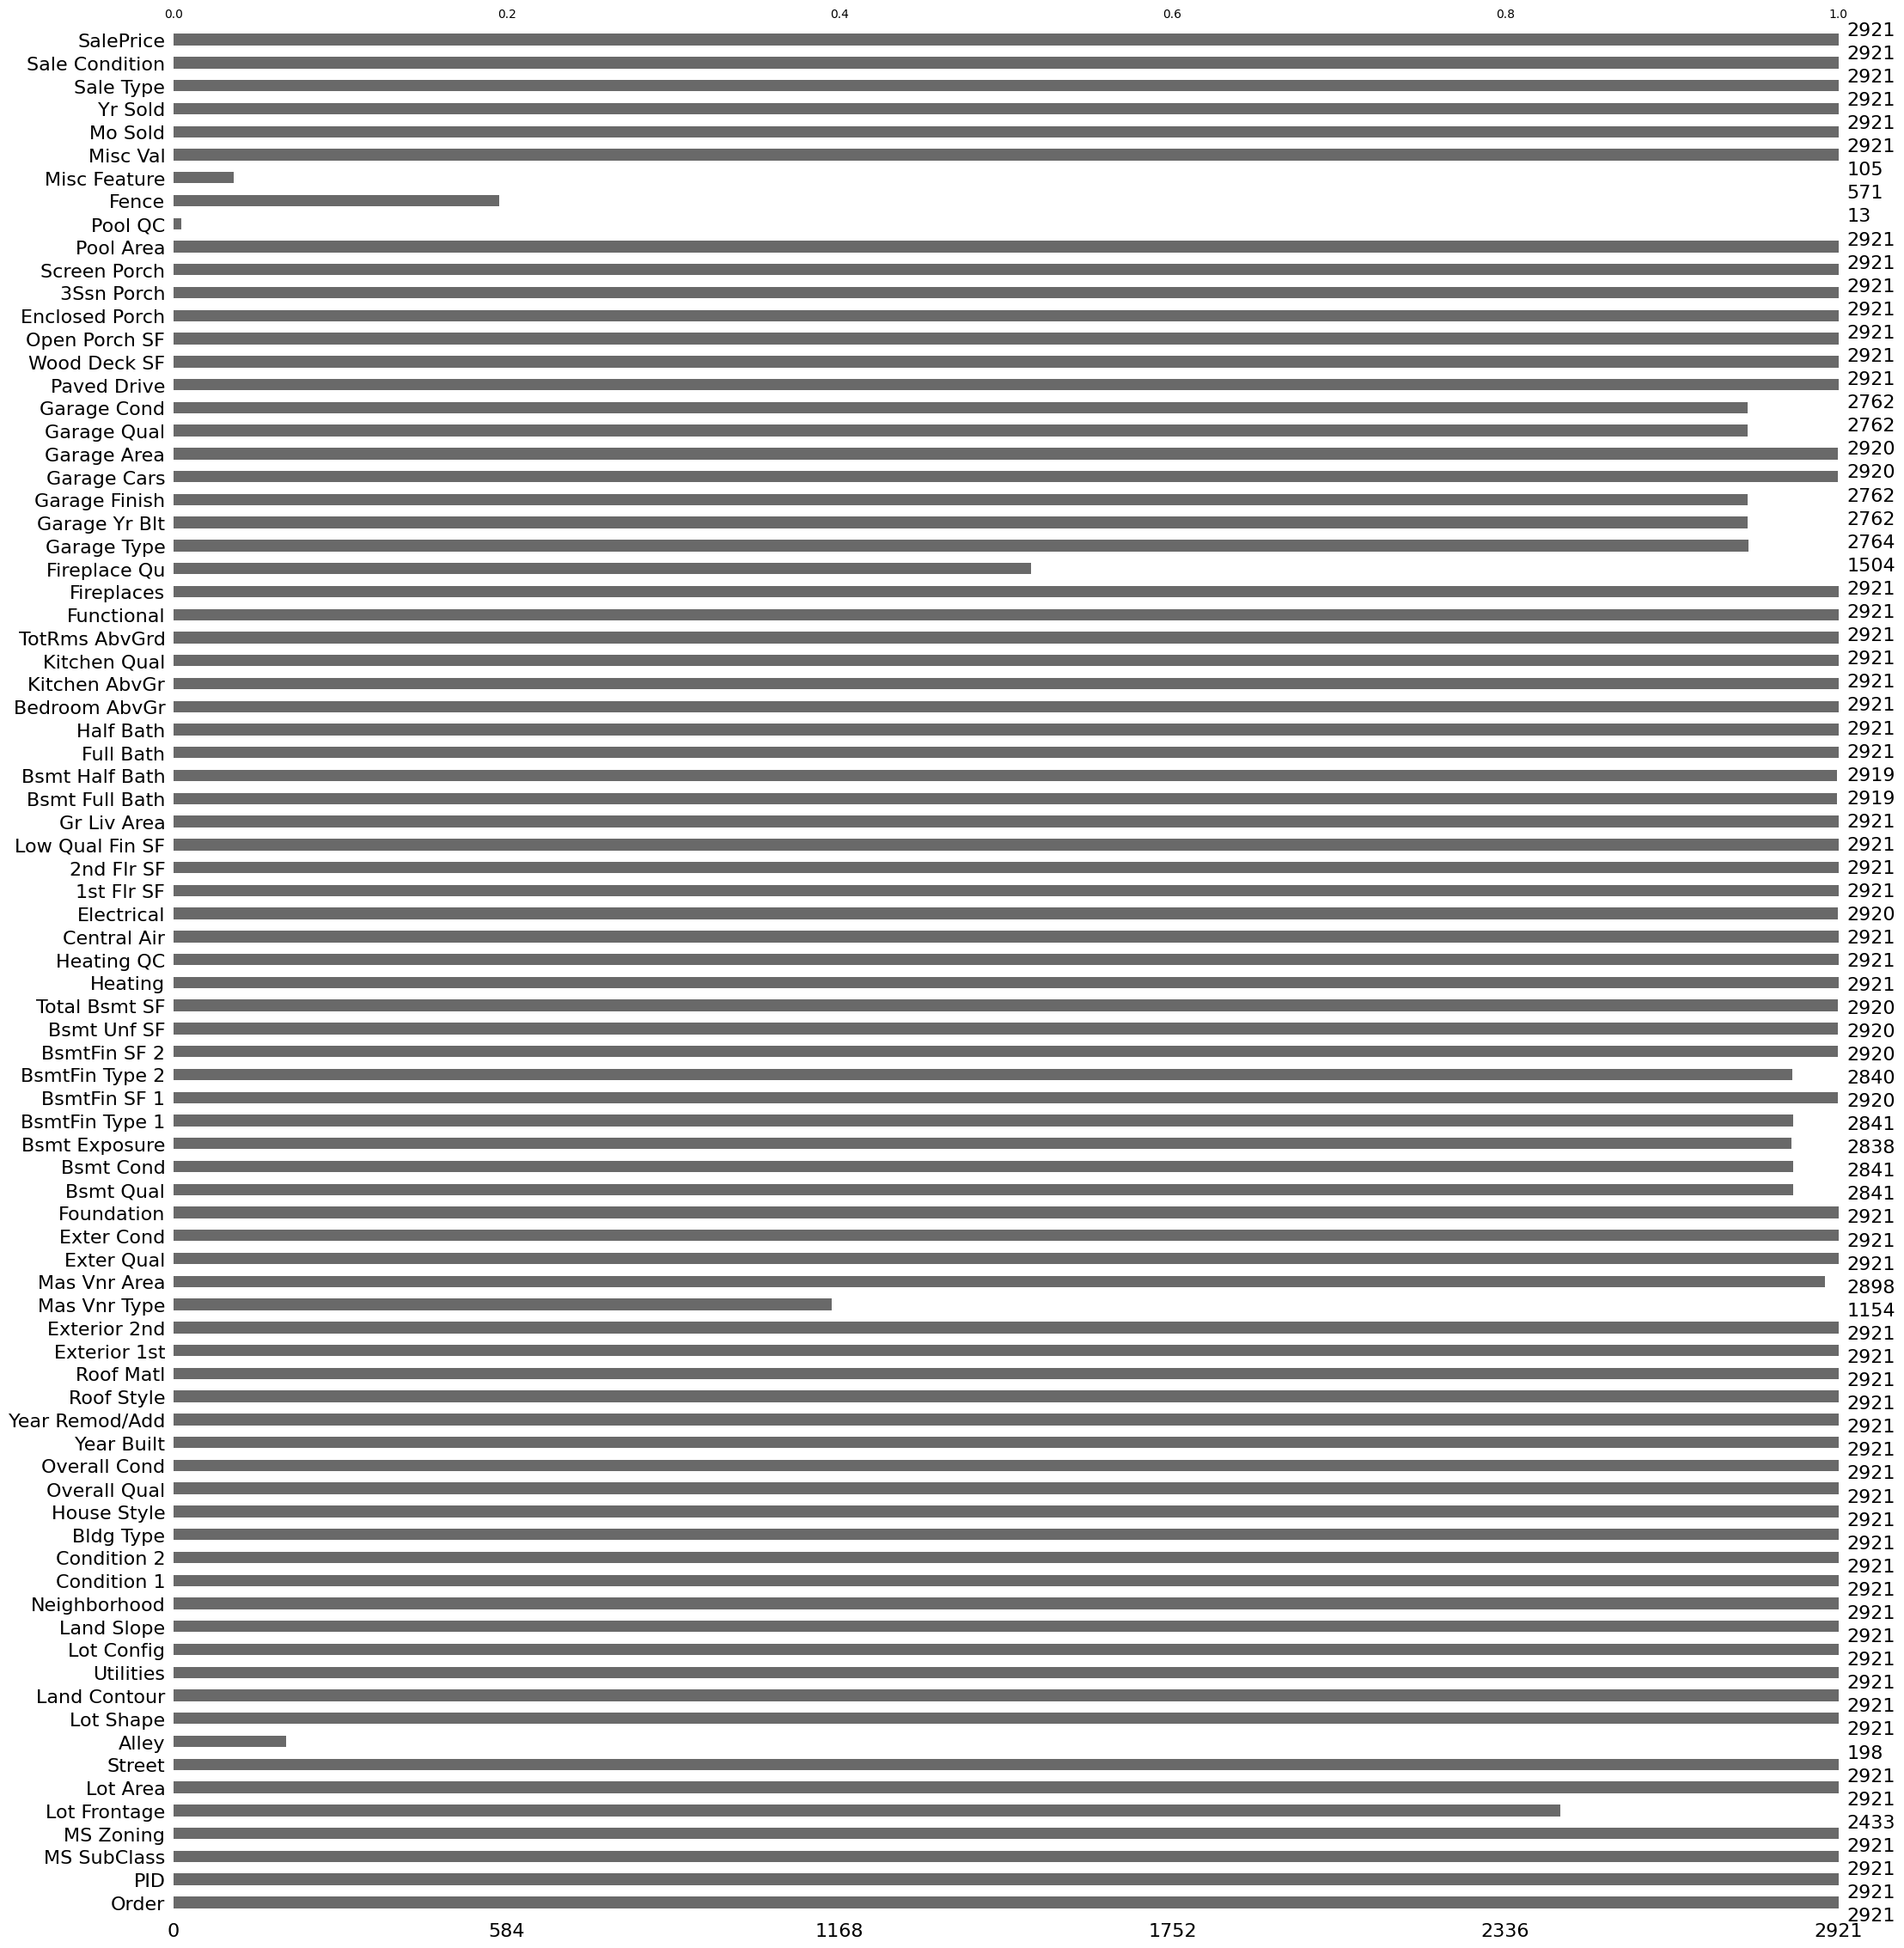

In [ ]:
# Gráfico de barras de valores faltantes por columna
msno.bar(df_casas_limpio)

* Valores Outliers

<Axes: xlabel='SalePrice'>

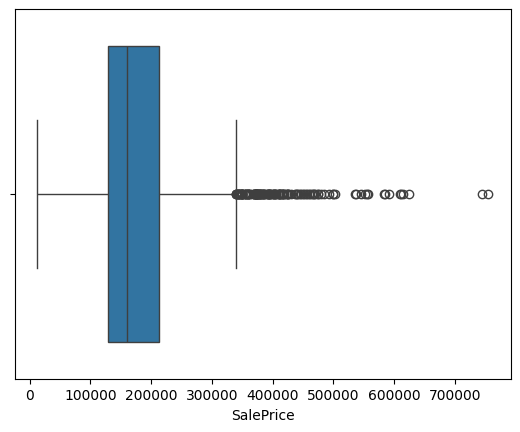

In [ ]:
sns.boxplot(x=df_casas_limpio['SalePrice'])

In [ ]:
# Calcular el IQR para 'SalePrice'
Q1 = df_casas_limpio['SalePrice'].quantile(0.25)
Q3 = df_casas_limpio['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Definir el límite superior para los outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filtrar las filas que son outliers en 'SalePrice'
outliers_saleprice = df_casas_limpio[df_casas_limpio['SalePrice'] > upper_bound]

# Mostrar los outliers ordenados de forma descendente por 'SalePrice'
display(outliers_saleprice.sort_values(by='SalePrice', ascending=False))

In [ ]:
outliers = outliers_saleprice.index
df_sin_outliers =df_casas_limpio.drop(outliers)

In [ ]:
df_sin_outliers

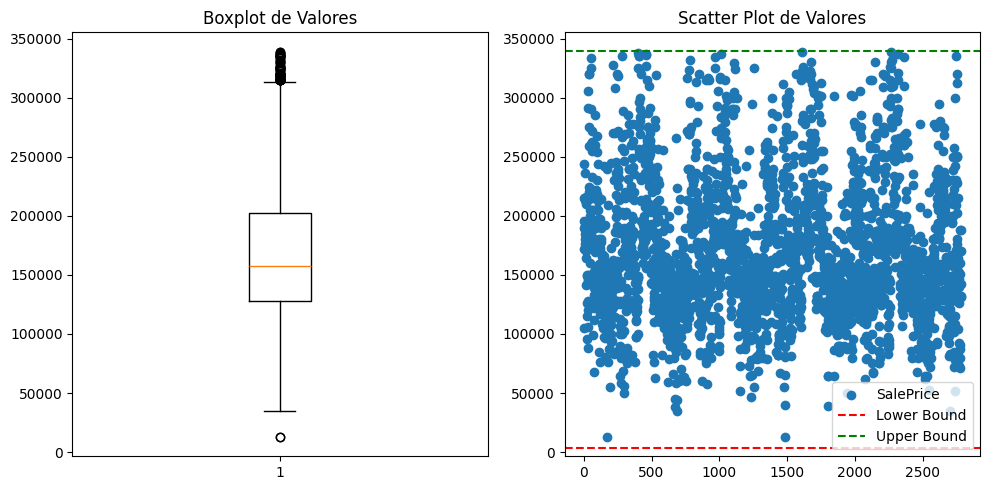

In [ ]:
# Visualización
plt.figure(figsize=(10, 5))

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot(df_sin_outliers['SalePrice'])
plt.title('Boxplot de Valores')

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(range(len(df_sin_outliers)), df_sin_outliers['SalePrice'], label='SalePrice')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='g', linestyle='--', label='Upper Bound')
plt.title('Scatter Plot de Valores')
plt.legend()

plt.tight_layout()
plt.show()

## **Imputación de Datos Nulos**

In [ ]:
df_casas_limpio_nulos = df_casas_limpio.copy()
# Copiamos el dataset limpio en una nueva variable por si queremos vovler a ella

**Lot Frontage - Longitud del frente del terreno**

Esta variable depende del vecindario: los lotes de la misma zona suelen tener frentes similar. Por eso, se imputa con la mediana del vecindario

In [ ]:
# Calcular la mediana de 'Lot Frontage' por vecindario
mediana_lotFrontage_por_vecindario = df_casas_limpio_nulos.groupby('Neighborhood')['Lot Frontage'].median()

# Rellenar los valores nulos en 'Lot Frontage' usando la mediana calculada por vecindario
df_casas_limpio_nulos['Lot Frontage'] = df_casas_limpio_nulos['Lot Frontage'].fillna(
    df_casas_limpio_nulos['Neighborhood'].map(mediana_lotFrontage_por_vecindario)
)

# Verificar si quedan valores nulos en 'Lot Frontage'
print("Valores nulos en 'Lot Frontage' después de la imputación sin lambda:")
print(df_casas_limpio_nulos['Lot Frontage'].isnull().sum())

Valores nulos en 'Lot Frontage' después de la imputación sin lambda:
3


**Alley - tipo de callejon**
**Misc Feature**

El alto porcentaje de valores nulos (más del 90%) indica que la característica no tiene suficiente información representativa, y su eliminación contribuye a reducir ruido y simplificar el modelo

In [ ]:
# Eliminamos la columna Alley por exceso de valores nulos
df_casas_limpio_nulos.drop(columns=['Alley'], inplace=True)
df_casas_limpio_nulos.drop(columns=['Misc Feature'], inplace=True)

# Confirmamos su eliminación
print("Columnas restantes:", df_casas_limpio_nulos.columns)

**Variables numericas donde 0 tiene sentido**


In [ ]:
cols_zero = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
              'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
              'Garage Cars', 'Garage Area']
df_casas_limpio_nulos[cols_zero] = df_casas_limpio_nulos[cols_zero].fillna(0)

**Variables categoricas donde None aplica**

In [ ]:
cols_none = ['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
             'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu',
             'Garage Type', 'Garage Finish', 'Garage Qual',
             'Garage Cond', 'Fence', 'Pool QC']
df_casas_limpio_nulos[cols_none] = df_casas_limpio_nulos[cols_none].fillna('None')

Variable **Electrical** : Se completa con el valor mas frecuente

In [ ]:
df_casas_limpio_nulos['Electrical'] = df_casas_limpio_nulos['Electrical'].fillna(df_casas_limpio_nulos['Electrical'].mode()[0])

Variable **Garage Yr Blt**: se completa con el año de construccion de la casa

In [ ]:
df_casas_limpio_nulos['Garage Yr Blt'] = df_casas_limpio_nulos['Garage Yr Blt'].fillna(df_casas_limpio_nulos['Year Built'])

Verificacion de nulos restantes

In [ ]:
# Mostrar la cantidad de valores nulos por columna
nulos_restantes = df_casas_limpio_nulos.isnull().sum()

# Filtrar para mostrar solo las columnas con valores nulos
nulos_restantes = nulos_restantes[nulos_restantes > 0]

print("Cantidad de valores nulos por columna:")
print(nulos_restantes)

Cantidad de valores nulos por columna:
Lot Frontage    3
dtype: int64


In [ ]:
# Mostrar filas con valores nulos
rows_with_nulls = df_casas_limpio_nulos[df_casas_limpio_nulos.isnull().any(axis=1)]
display(rows_with_nulls)

En el proceso de imputación de Lot Frontage, se reemplazaron los valores nulos utilizando la mediana agrupada por vecindario, ya que las dimensiones de los lotes tienden a ser similares dentro de una misma zona.
Sin embargo, se detectaron tres registros que permanecían con valores nulos debido a que pertenecen a vecindarios con escasos datos disponibles (GrnHill y Landmrk).
Para evitar eliminar información valiosa, estos valores se imputaron con la mediana general de la variable, manteniendo la consistencia del conjunto de datos.

In [ ]:
# Imputamos los pocos valores restantes con la mediana general
df_casas_limpio_nulos['Lot Frontage'] = df_casas_limpio_nulos['Lot Frontage'].fillna(df_casas_limpio_nulos['Lot Frontage'].median())

In [ ]:
# Mostrar la cantidad de valores nulos por columna
nulos_restantes = df_casas_limpio_nulos.isnull().sum()

# Filtrar para mostrar solo las columnas con valores nulos
nulos_restantes = nulos_restantes[nulos_restantes > 0]

print("Cantidad de valores nulos por columna:")
print(nulos_restantes)

Cantidad de valores nulos por columna:
Series([], dtype: int64)


In [ ]:
df_casas_limpio_nulos.info()
df_casas_limpio_nulos.isnull().sum().sum()

En esta etapa se realizó un proceso de limpieza e imputación de datos faltantes.
Las columnas con un alto porcentaje de valores nulos y escasa relevancia predictiva
('Alley' y 'Misc Feature') fueron eliminadas del dataset.

Para las variables numéricas que representan áreas o cantidades de elementos (por ejemplo, 'Garage Area', 'BsmtFin SF 1'),
los valores nulos fueron reemplazados por 0, interpretando que la ausencia de datos equivale a la ausencia del elemento.

Las variables categóricas con nulos relacionados a la inexistencia de una característica (como 'Bsmt Qual' o 'Fireplace Qu')
fueron imputadas con la categoría 'None'.

En los casos donde el valor faltante se debía a un error o falta de registro (como 'Electrical' o 'Lot Frontage'),
se imputaron con el valor más frecuente o con la mediana agrupada por vecindario, respectivamente.

De esta manera, el dataset quedó limpio y consistente para continuar con las transformaciones y el modelado.

## Transformaciones de Fechas/Nombres de variables/Valores

In [ ]:
df_casas_trans_limpio = df_casas_limpio_nulos.copy()

Normalizacion de nombre de columnas
todas a formato *snake_case*

In [ ]:
df_casas_trans_limpio.columns = df_casas_trans_limpio.columns.str.lower().str.replace(' ', '_')
df_casas_trans_limpio

In [ ]:
df_casas_trans_limpio.select_dtypes('object').nunique().sort_values(ascending=False)
# Revision de variables categoricas

# **EDA: Análisis Exploratorio de datos**

In [ ]:
df_casas_graficos = df_casas_trans_limpio.copy()

**Análisis univariado**

In [ ]:
# Estilo visual
sns.set_style(style="darkgrid", rc={"grid.color": ".6"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})
sns.set_palette("dark")

In [ ]:
# sns.reset_orig()

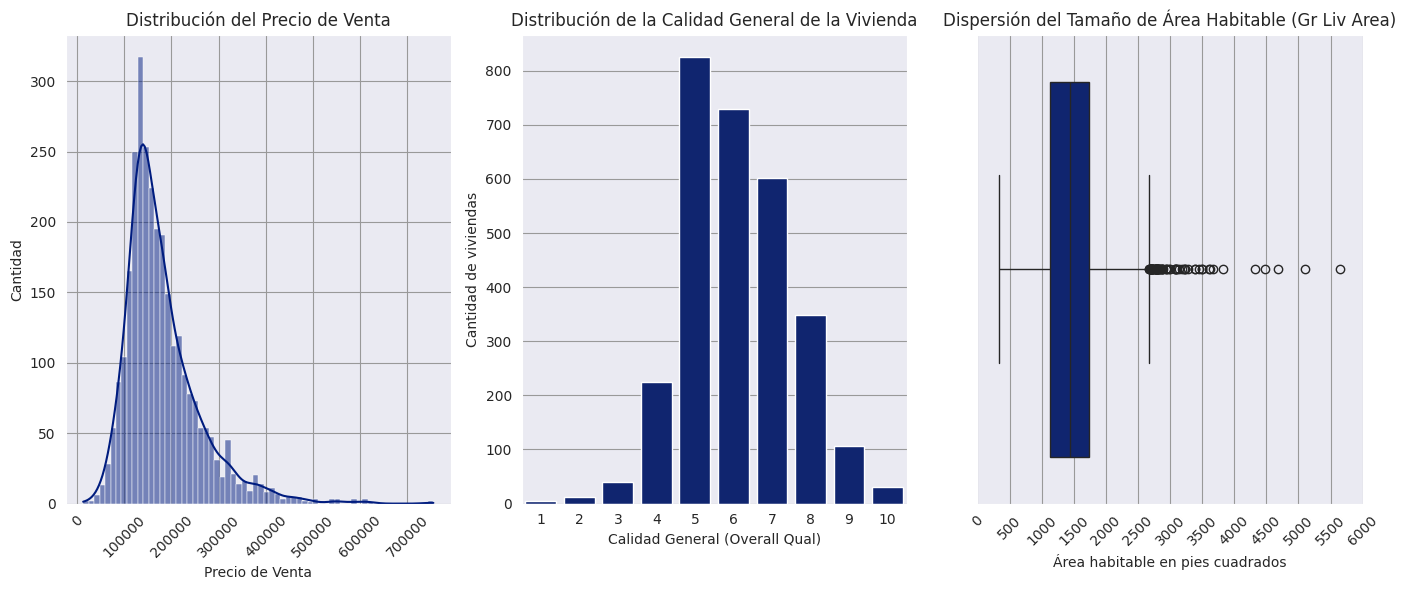

In [ ]:
# Crear una figura y ejes con Matplotlib
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Graficar en el primer eje
sns.histplot(df_casas_graficos['saleprice'], kde=True,ax=ax[0])
ax[0].set_xlabel("Precio de Venta")
ax[0].set_ylabel("Cantidad")
ax[0].set_title('Distribución del Precio de Venta')
ax[0].tick_params(axis='x', rotation=45) # Aplicamos rotacion a los valores del eje x


# Graficar en el segundo eje
sns.countplot(x='overall_qual', data=df_casas_graficos,ax=ax[1])
ax[1].set_xlabel("Calidad General (Overall Qual)")
ax[1].set_ylabel("Cantidad de viviendas")
ax[1].set_title("Distribución de la Calidad General de la Vivienda")

#Graficamos en el tercer eje
sns.boxplot(x=df_casas_graficos['gr_liv_area'],ax=ax[2])
ax[2].set_xlabel("Área habitable en pies cuadrados")
ax[2].set_title("Dispersión del Tamaño de Área Habitable (Gr Liv Area)")
# Seteamos los ticks del eje x de 500 en 500
ax[2].set_xticks(range(0, int(df_casas_graficos['gr_liv_area'].max()) + 500, 500))
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- Grafico 1: La variable SalePrice presenta una distribución sesgada a la derecha
- Grafico 2: Muestra cómo se distribuye la percepción de calidad de las casas. Las más comunes suelen ser calidad 5 a 7
- Grafico 3: Permite detectar posibles outliers en las casas de gran tamaño.

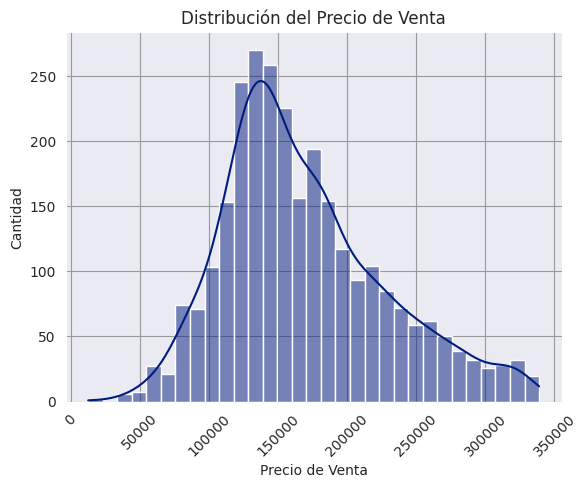

In [ ]:
sns.histplot(df_sin_outliers['SalePrice'], kde=True) # Grafico de distribucion con el dataset sin outliers
plt.title('Distribución del Precio de Venta')
plt.xlabel("Precio de Venta")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

**Análisis bivariado**

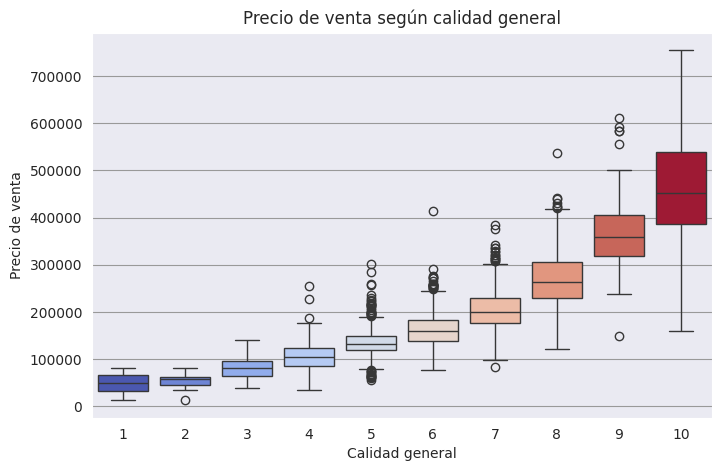

In [ ]:
# Relación entre calidad general y precio
plt.figure(figsize=(8,5))
sns.boxplot(x='overall_qual', y='saleprice', data=df_casas_graficos, palette='coolwarm', hue='overall_qual', legend=False)
# Se agrega hue y legend='false' debido a que sin ellas sale una advertencia
plt.title("Precio de venta según calidad general")
plt.xlabel("Calidad general")
plt.ylabel("Precio de venta")
plt.show()

Se visualiza una relación positiva: mayor calidad ⇒ mayor precio.

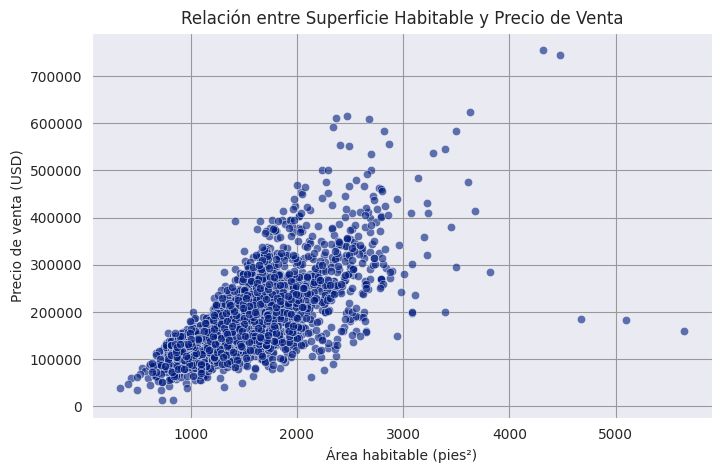

In [ ]:
#  Superficie habitable vs. precio
plt.figure(figsize=(8,5))
sns.scatterplot(x='gr_liv_area', y='saleprice', data=df_casas_graficos, alpha=0.6)
plt.title("Relación entre Superficie Habitable y Precio de Venta")
plt.xlabel("Área habitable (pies²)")
plt.ylabel("Precio de venta (USD)")
plt.show()

Confirma que las casas más grandes tienden a tener precios más altos, aunque con algunos outliers.

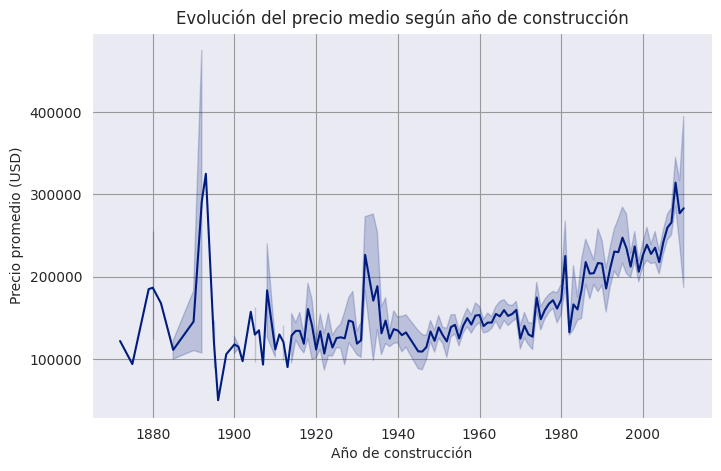

In [ ]:
# Año de construcción vs. precio
plt.figure(figsize=(8,5))
sns.lineplot(x='year_built', y='saleprice', data=df_casas_graficos)
plt.title("Evolución del precio medio según año de construcción")
plt.xlabel("Año de construcción")
plt.ylabel("Precio promedio (USD)")
plt.show()

Se observa un pico entre 1890 y 1900, podria ser un posible outlier o en esa epoca valen mas. Luego se puede observar un pico creciente con un aumento de valor de las casas alrededor de la Guerra Mundial

**Análisis multivariado**

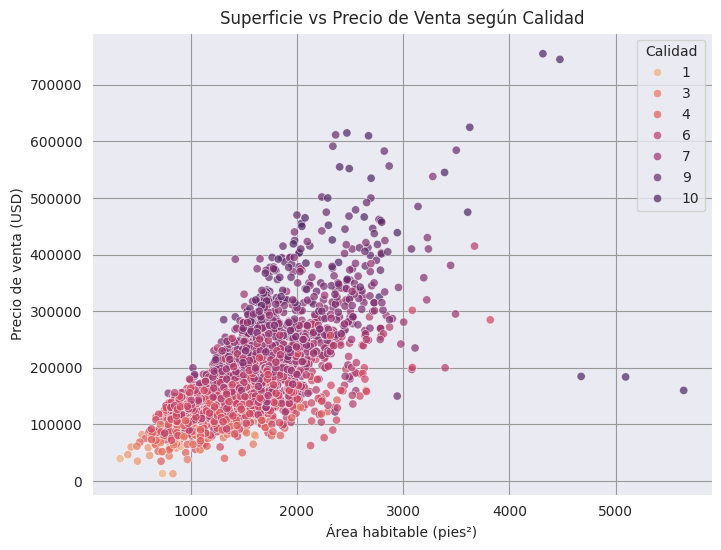

In [ ]:
# Precio, superficie y calidad general
plt.figure(figsize=(8,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='overall_qual', data=df_casas_graficos, palette='flare', alpha=0.7)
plt.title("Superficie vs Precio de Venta según Calidad")
plt.xlabel("Área habitable (pies²)")
plt.ylabel("Precio de venta (USD)")
plt.legend(title="Calidad")
plt.show()

Se observa cómo la calidad amplifica el precio en casas con mayor superficie

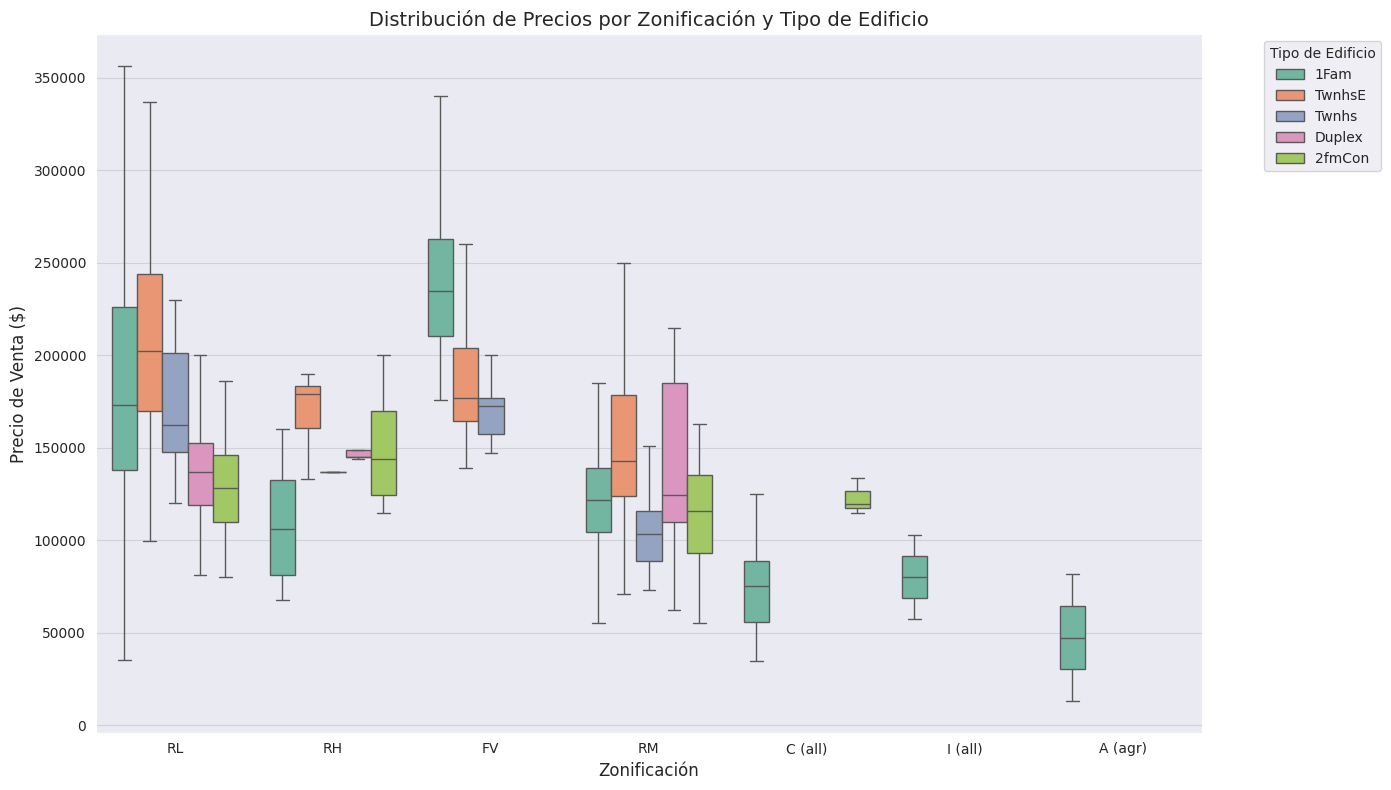

In [ ]:
# Boxplot multivariado
plt.figure(figsize=(14, 8))

sns.boxplot(data=df_casas_graficos, x='ms_zoning', y='saleprice', hue='bldg_type',
           palette='Set2', showfliers=False)

plt.title('Distribución de Precios por Zonificación y Tipo de Edificio', fontsize=14)
plt.xlabel('Zonificación', fontsize=12)
plt.ylabel('Precio de Venta ($)', fontsize=12)
plt.legend(title='Tipo de Edificio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

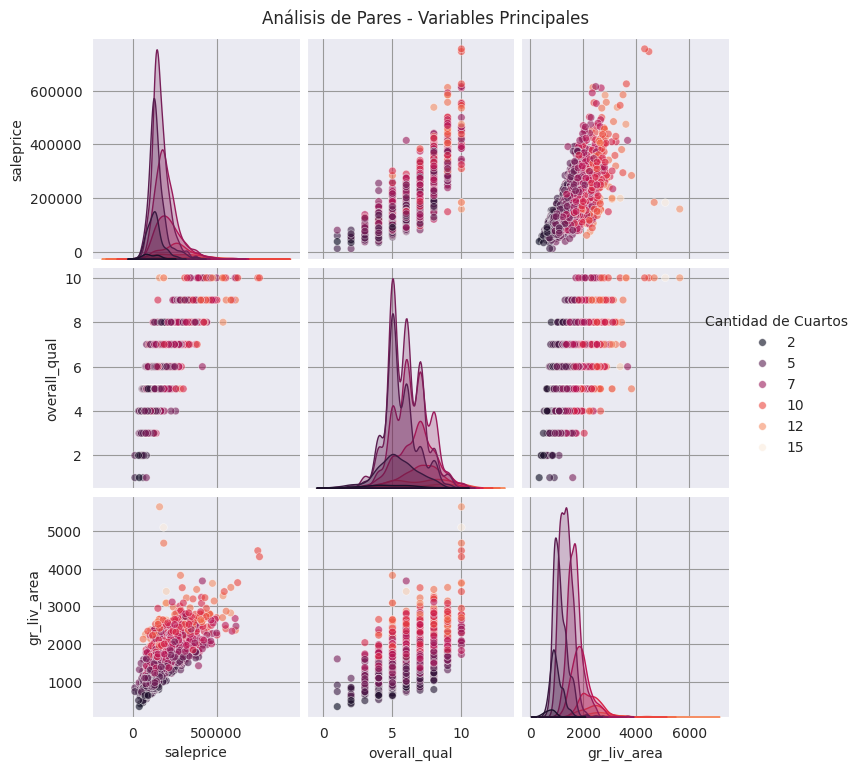

In [ ]:
# Pairplot para análisis multivariado rápido
variables_pair = ['saleprice', 'overall_qual', 'gr_liv_area', 'totrms_abvgrd']

g = sns.pairplot(df_casas_graficos[variables_pair],
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 30},
             diag_kws={'fill': True},
             hue='totrms_abvgrd',
             palette='rocket'

              )

# Change the legend title
g._legend.set_title("Cantidad de Cuartos")

plt.suptitle('Análisis de Pares - Variables Principales', y=1.02)
plt.show()

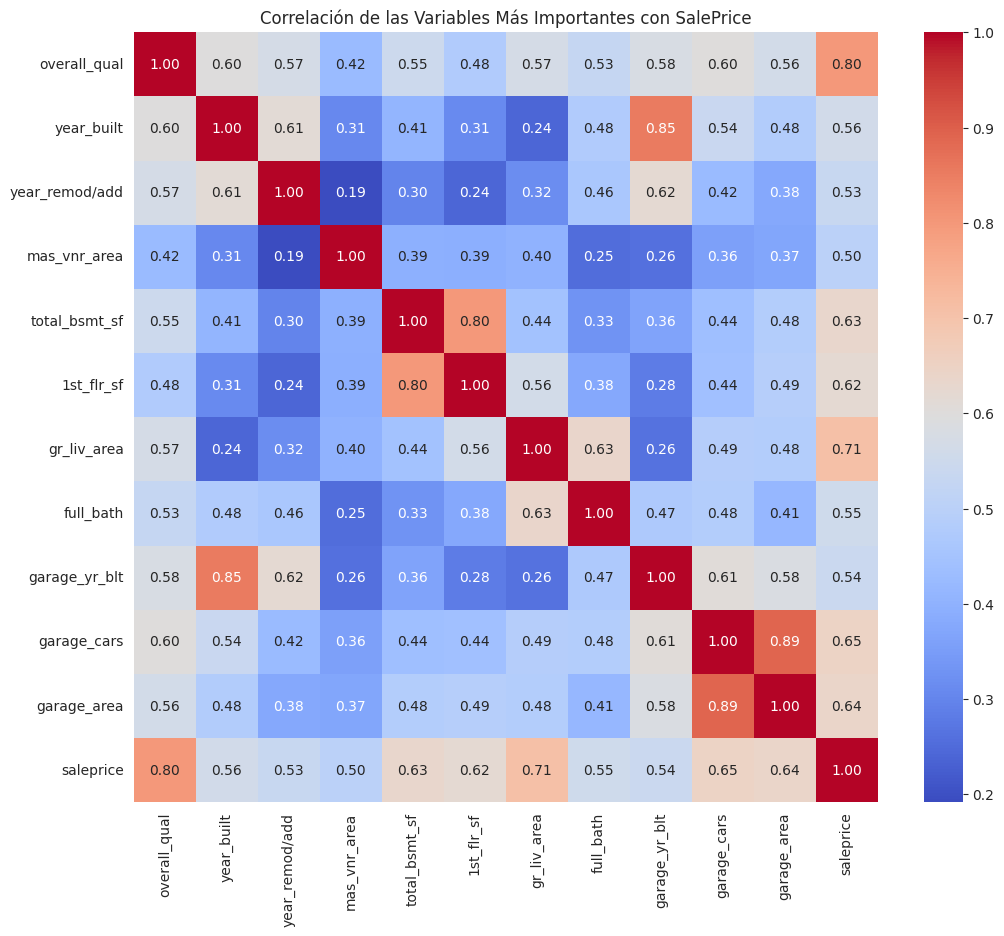

--- Correlación de tus nuevas variables con el Precio ---
saleprice        1.000000
overall_qual     0.798568
gr_liv_area      0.706858
year_built       0.558952
totrms_abvgrd    0.498570
Name: saleprice, dtype: float64


In [ ]:

# Calculamos la matriz de correlación (solo numéricas)
corr_matrix = df_casas_graficos.corr(numeric_only=True)

# Filtramos para ver las más importantes
# Nos quedamos con las variables que tengan al menos 0.5 de correlación (positiva o negativa) con el precio
top_corr_features = corr_matrix.index[abs(corr_matrix["saleprice"]) > 0.5]

plt.figure(figsize=(12, 10))
# Graficamos solo esas variables top
sns.heatmap(df_casas_graficos[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación de las Variables Más Importantes con SalePrice")
plt.show()

# 3. Verificamos numéricamente cómo les fue a tus nuevas variables
print("--- Correlación de tus nuevas variables con el Precio ---")
new_vars = ['overall_qual', 'gr_liv_area', 'totrms_abvgrd', 'year_built', 'saleprice']
# Filtramos solo las que existen para evitar error
existing_new_vars = [col for col in new_vars if col in df_casas_graficos.columns]
print(df_casas_graficos[existing_new_vars].corr()['saleprice'].sort_values(ascending=False))

## **Conclusiones del EDA**

1. **Distribución del Precio de Venta**
Hallazgos principales:

   * La distribución del precio de venta está sesgada a la derecha, indicando que la mayoría de las viviendas tienen precios en el rango bajo-medio

    * Existe una cola larga hacia la derecha que representa propiedades de alto valor

    * Esto sugiere la presencia de valores atípicos en el extremo superior que podrían distorsionar algunos modelos

2. **Relación entre Calidad General y Precio**
Hallazgos clave:

    * Correlación positiva muy fuerte entre calidad general y precio de venta

    * Las propiedades con calidad 10 alcanzan precios hasta $700,000 USD

    * Existe una progresión casi lineal: a mayor calidad, mayor precio

    * La calidad 5-6 representa el segmento medio del mercado

    * Insight importante: La calidad general es uno de los predictores más fuertes del precio

3. **Superficie Habitable vs Precio**
Relación identificada:

    * Correlación positiva clara entre área habitable y precio

    * Se observa una tendencia lineal creciente con cierta dispersión

    * Propiedades con áreas superiores a 3,000 pies cuadrados muestran mayor variabilidad en precios

    * Punto crítico: Existen algunos outliers que se desvían de la tendencia general

4. **Análisis Temporal: Año de Construcción**
Tendencias históricas:

    * Aumento constante del valor de las propiedades construidas después de 1940

    * Pico interesante entre 1890-1900 que requiere investigación (¿propiedades históricas? ¿outliers?)

    * Crecimiento acelerado post-Segunda Guerra Mundial

    * Las propiedades más modernas (2000+) mantienen valores elevados

    * Insight: La antigüedad influye, pero propiedades muy antiguas pueden tener valor histórico

5. **Análisis Multivariado: Superficie + Calidad + Precio**
Patrones complejos identificados:

    * La calidad actúa como moderador de la relación superficie-precio

    * Para una misma superficie, la calidad puede multiplicar el valor

    * Propiedades con alta calidad (8-10) y gran superficie alcanzan los precios máximos

    * Hallazgo crucial: La combinación superficie-calidad explica gran parte de la variabilidad del precio

6. **Zonificación y Tipo de Edificio**
Segmentación del mercado:

    * La zonificación RL (Residencial Baja Densidad) concentra los precios

    * Los tipos de edificio "1Fam" (unifamiliar) dominan el mercado alto

7. **Analisis Variables Principales**

    * Existe a una mayor cantidad de cuartos, un aumento de precios y calidad
    * Se Visualiza que a mayor cantidad de superficie mayor cantidad de cuartos





 **Variables Clave Identificadas:**

- Calidad General - Predictor más fuerte

- Área Habitable - Relación lineal clara con precio

- Zonificación - Factor de segmentación importante

- Tipo de Edificio - Define categorías de propiedad

- Año de Construcción - Componente temporal/valor histórico

En resumen, el análisis revela que el precio de las viviendas en Ames está determinado por una combinación de factores físicos (calidad, tamaño), temporales (antigüedad) y de ubicación (zonificación), con interacciones complejas entre estas variables que deberán capturarse en el modelo predictivo.

# **Pre Procesamiento de datos**

In [ ]:
df_pre = df_casas_trans_limpio.copy()

### **Reduccion manual de dimensiones**

 **Variables que conviene eliminar para simplificar el modelo**

 **Order**

* Número de fila del dataset original.
* No aporta información útil sobre el inmueble.

**PID**

* Identificador único de la parcela.
* No describe características físicas ni funcionales de la vivienda.

**Street**

* Tipo de calle (Pave/Gravel).
* Tiene muy poca variabilidad y no influye significativamente en el precio.

**Condition2**

* La mayoría de los valores son “Norm”.
* Presenta muy baja varianza y aporta ruido.

**RoofMatl**

* Material del techo.
* Gran parte de las viviendas comparten el mismo valor (“CompShg”).

**RoofStyle**

* Diferentes estilos de techo, pero con correlación mínima con el valor de la propiedad.
* Se elimina para simplificar la dimensionalidad.

**Exterior1st & Exterior2nd**

* Materiales del exterior, con alta cardinalidad.
* Aumentan el número de variables tras el one-hot encoding.
* Se eliminan para evitar complejidad innecesaria.

**MasVnrType y MasVnrArea**

* Revestimiento de mampostería.
* Presentan muchos valores nulos porque la mayoría de las viviendas no cuentan con este tipo de acabado.

**PoolArea y PoolQC**

* Área y calidad de la piscina.
* Más del 99% de las casas no tienen piscina, lo que genera valores nulos o ceros predominantes.

**MoSold**

* Mes de venta.
* Presenta muy poca correlación con el precio final.

**BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF**

* Información detallada del sótano.
* Muy correlacionadas entre sí y con `TotalBsmtSF`
* Se eliminan para reducir ruido sin perder información relevante.

**Utilities**

* Esta variable describe los servicios disponibles en la propiedad (agua, electricidad, gas).
* Más del 99% de los valores corresponden a *AllPub*, mostrando una variabilidad extremadamente baja.
* Las variables con baja varianza no contribuyen a los algoritmos de regresión.

**LandContour**

* Indica la planitud del terreno.
* La mayoría de las propiedades se clasifican como "Lvl" (nivelado).
* La baja diversidad de categorías reduce su relevancia predictiva.


**Condition1**

* Representa la proximidad a vías importantes u otras condiciones físicas externas.
* Más del 90% de las viviendas están en estado *Norm*.

**Heating**

* Tipo de calefacción instalada en el hogar.
* La categoría predominante es *GasA*, con frecuencia superior al 95%.
* Existen otras variables más relevantes relacionadas con calefacción, como HeatingQC.

**Electrical**

* Sistema eléctrico del domicilio.
* Presenta más del 90% de valores “SBrkr”.
* Su distribución no permite que el modelo extraiga patrones significativos.

**LowQualFinSF**

* Superficie terminada de baja calidad.
* En la mayoría de propiedades el valor es *0*, lo que indica ausencia de este tipo de terminación.
* La falta de variación la hace poco informativa.



**3SsnPorch**

* Superficie del porche de tres estaciones.
* Es una característica casi inexistente en el dataset.
* Sólo un número muy reducido de casas cuenta con esta característica.


**Fence**

* Tipo y calidad de la cerca.
* Tiene una altísima proporción de valores nulos.
* Su impacto sobre el precio es mínimo comparado con otras características externas.



In [ ]:
df_pre.columns

In [ ]:
cols_drop = [
    "order", "pid", "street", "condition_2", "roof_style", "roof_matl",
    "exterior_1st", "exterior_2nd", "mas_vnr_type", "mas_vnr_area",
    "bsmt_exposure", "bsmtfin_type_1", "bsmtfin_sf_1",
    "bsmtfin_type_2", "bsmtfin_sf_2", "bsmtfin_unf_sf",
    "pool_area", "pool_qc","mo_sold","utilities","land_contour","condition_1","heating",
    "electrical","low_qual_fin_sf","3ssn_porch","fence"
]

# Verificamos que las columnas existan antes de eliminar para evitar errores
cols_to_drop = [col for col in cols_drop if col in df_pre.columns]

# Eliminamos las columnas
df_pre = df_pre.drop(columns=cols_to_drop)

print(f"Columnas eliminadas: {cols_to_drop}")
print(f"Shape final del dataset: {df_pre.shape}")

Columnas eliminadas: ['order', 'pid', 'street', 'condition_2', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'pool_area', 'pool_qc', 'mo_sold', 'utilities', 'land_contour', 'condition_1', 'heating', 'electrical', 'low_qual_fin_sf', '3ssn_porch', 'fence']
Shape final del dataset: (2921, 54)


In [ ]:
df_pre.columns

### **Preprocesamiento selectivo / MAPEO ORDINAL**

In [ ]:
columnas_categoricas = df_pre.select_dtypes(include='object').columns.tolist()
columnas_calidad = [
    'exter_qual',
    'exter_cond',
    'bsmt_qual',
    'bsmt_cond',
    'heating_qc',
    'kitchen_qual',
    'fireplace_qu',
    'garage_qual',
    'garage_cond'
]
columnas_orden_especial = [
    'garage_finish',
    'lot_shape',
    'functional',
    'paved_drive'
]

In [ ]:
# Verificacion de los valores únicos columnas de calidad
for columna in columnas_calidad:
    valores_unicos = df_pre[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")

Valores únicos en 'exter_qual': ['TA' 'Gd' 'Ex' 'Fa']
Valores únicos en 'exter_cond': ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Valores únicos en 'bsmt_qual': ['TA' 'Gd' 'Ex' 'None' 'Fa' 'Po']
Valores únicos en 'bsmt_cond': ['Gd' 'TA' 'None' 'Po' 'Fa' 'Ex']
Valores únicos en 'heating_qc': ['Fa' 'TA' 'Ex' 'Gd' 'Po']
Valores únicos en 'kitchen_qual': ['TA' 'Gd' 'Ex' 'Fa' 'Po']
Valores únicos en 'fireplace_qu': ['Gd' 'None' 'TA' 'Po' 'Ex' 'Fa']
Valores únicos en 'garage_qual': ['TA' 'None' 'Fa' 'Gd' 'Ex' 'Po']
Valores únicos en 'garage_cond': ['TA' 'None' 'Fa' 'Gd' 'Ex' 'Po']


In [ ]:

# Definimos el diccionairo
calidad_map = {
    'Ex': 5,      # Excellent
    'Gd': 4,      # Good
    'TA': 3,      # Typical/Average
    'Fa': 2,      # Fair
    'Po': 1,      # Poor
    'None': 0,    # No existe la característica (Sótano, Garage, etc.)
    np.nan: 0     # Por seguridad, si quedara algún nulo real
}

# Usamos un bucle para procesar todas de una vez
for col in columnas_calidad:
    # Verificamos si la columna existe en el DF para evitar errores
    if col in df_pre.columns:
        df_pre[col] = df_pre[col].map(calidad_map)

        #En el caso que un valor no se encuentra en el mapa se rellena con 0
        df_pre[col] = df_pre[col].fillna(0).astype(int)



In [ ]:
# Verificacion de los valores únicos con orden especial
for columna in columnas_orden_especial:
    valores_unicos = df_pre[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")

Valores únicos en 'garage_finish': ['Fin' 'Unf' 'RFn' 'None']
Valores únicos en 'lot_shape': ['IR1' 'Reg' 'IR2' 'IR3']
Valores únicos en 'functional': ['Typ' 'Mod' 'Min1' 'Min2' 'Maj1' 'Maj2' 'Sev' 'Sal']
Valores únicos en 'paved_drive': ['P' 'Y' 'N']


In [ ]:
# Definición de Mapeos Ordinales Especiales

# GarageFinish: Fin (Mejor) > RFn > Unf > None (Peor)
garage_finish_map = {
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'None': 0,
    np.nan: 0
}

# Functional: Typ (Mejor) > ... > Sal (Peor)
functional_map = {
    'Typ': 7,   # Tipica
    'Min1': 6,  # Mínimamente reducidad 1
    'Min2': 5,  # Mínimamente reducida 2
    'Mod': 4,   # Moderadamente reducida
    'Maj1': 3,  # Mayormente reducida 1
    'Maj2': 2,  # Mayormente reducida 2
    'Sev': 1,   # Severamente dañada
    'Sal': 0,   # Salvamento / solo vale por su terreno o materiales
}

# PavedDrive: Y (Mejor) > P > N (Peor)
paved_drive_map = {
    'Y': 2, # Si
    'P': 1, # Parcialmente
    'N': 0, # No
    np.nan: 0
}

# LotShape: Reg (Mejor/Estándar) > IR1 > IR2 > IR3 (Peor forma)
lot_shape_map = {
    'Reg': 3,
    'IR1': 2,
    'IR2': 1,
    'IR3': 0,
    np.nan: 0
}

# Land Slope: De menor pendiente a mayor pendiente
slope_map = {
    'Gtl': 1,  # Gentle
    'Mod': 2,  # Moderate
    'Sev': 3   # Severe
}

# Central Air: Binario
air_map = {'Y': 1, 'N': 0}

# aplicaMOS los mapeos
df_pre['garage_finish'] = df_pre['garage_finish'].map(garage_finish_map)
df_pre['functional'] = df_pre['functional'].map(functional_map)
df_pre['paved_drive'] = df_pre['paved_drive'].map(paved_drive_map)
df_pre['lot_shape'] = df_pre['lot_shape'].map(lot_shape_map)
df_pre['land_slope'] = df_pre['land_slope'].map(slope_map)
df_pre['central_air'] = df_pre['central_air'].map(air_map)


In [ ]:
#Verificación rápida
print("--- Muestra de los datos transformados ---")
print(df_pre[columnas_calidad].head())
print(df_pre[columnas_orden_especial].head())

print("\n--- Verificación de tipos de datos (deben ser int o float) ---")
print(df_pre[columnas_calidad].dtypes)
print(df_pre[columnas_orden_especial].dtypes)

--- Muestra de los datos transformados ---
   exter_qual  exter_cond  bsmt_qual  bsmt_cond  heating_qc  kitchen_qual  \
0           3           3          3          4           2             3   
1           3           3          3          3           3             3   
2           3           3          3          3           3             4   
3           4           3          3          3           5             5   
4           3           3          4          3           4             3   

   fireplace_qu  garage_qual  garage_cond  
0             4            3            3  
1             0            3            3  
2             0            3            3  
3             3            3            3  
4             3            3            3  
   garage_finish  lot_shape  functional  paved_drive
0              3          2           7            1
1              1          3           7            2
2              1          2           7            2
3              3  

### **Feature Engineering**

 Feature Engineering consiste en el proceso de transformar datos sin procesar en información relevante para utilizarla en modelos de aprendizaje automático

Se tomo la decision de agregar una variable de edad de casa y edad desde la ultima remod. Creo que el algoritmo entenderia mejor la edad de algo que el año en que se hizo.

In [ ]:
# Crear variables de edad
df_pre['house_age'] = df_pre['yr_sold'] - df_pre['year_built']
df_pre['remod_age'] = df_pre['yr_sold'] - df_pre['year_remod/add']


# Forzamos a que el mínimo sea 0.
df_pre['house_age'] = df_pre['house_age'].apply(lambda x: 0 if x < 0 else x)
df_pre['remod_age'] = df_pre['remod_age'].apply(lambda x: 0 if x < 0 else x)


Tenemos `gr_liv_area` que suele ser (piso1+piso2) y `total_bsmt_sf`. Si se suma todo, tenemos el tamaña real de la construccion. Que aportara una variable determinante para la predicción

In [ ]:
# Creamos Superficie Total
# Sumamos el área habitable sobre el suelo + el área del sótano
df_pre['total_sf'] = df_pre['gr_liv_area'] + df_pre['total_bsmt_sf']

print("Variable 'total_sf' creada.")

Variable 'total_sf' creada.


Haremos lo mismo con los baños

*   `full_bath` y `half_bath` (contara como 0.5)
*   `bsmt_full_bath` y `bsmt_half_bath` (contara como 0.5)



In [ ]:
columnas_bano = [
    'full_bath',
    'half_bath',
    'bsmt_full_bath',
    'bsmt_half_bath',
]

In [ ]:
# Verificacion de los valores únicos con orden especial
for columna in columnas_bano:
    valores_unicos = df_pre[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")

Valores únicos en 'full_bath': [1 2 3 4 0]
Valores únicos en 'half_bath': [0 1 2]
Valores únicos en 'bsmt_full_bath': [1. 0. 2. 3.]
Valores únicos en 'bsmt_half_bath': [0. 1. 2.]


In [ ]:
# Crear Total de Baños (Asumiendo que Half Bath vale 0.5)

df_pre['total_bath'] = (
    df_pre['full_bath'] +
    (0.5 * df_pre['half_bath']) +
    df_pre['bsmt_full_bath'] +
    (0.5 * df_pre['bsmt_half_bath'])
)


print("Variable 'total_bath' creada.")
# Verificamos
print(df_pre['total_bath'].describe())

Variable 'total_bath' creada.
count    2921.000000
mean        2.217905
std         0.808040
min         1.000000
25%         1.500000
50%         2.000000
75%         2.500000
max         7.000000
Name: total_bath, dtype: float64


**Columnas Porche/Deck**

Existen muchas columnas de dekk y porche que suelente tener muchos 0, ya que las casas no tinene todos los tipos de porche. Las sumaremos en una sola

In [ ]:
columnas_porche = [
    'open_porch_sf',
    'enclosed_porch',
    'screen_porch',
    'wood_deck_sf',
]

In [ ]:
df_pre[columnas_porche]

In [ ]:
# Sumamos solo las columnas de SUPERFICIE (SF)
df_pre['total_porch_sf'] = (
    df_pre['open_porch_sf'] +
    df_pre['enclosed_porch'] +
    df_pre['screen_porch'] +
    df_pre['wood_deck_sf']
)

**Dropeado de Columnas viejas**

Al ya tener la informacion de las columnas viejas en las nuevas eliminamos las que no utilizamos

In [ ]:
# Columnas que ya "resumimos" y podemos eliminar para reducir ruido y dimensionalidad
cols_to_drop_pre = [
    'year_built', 'year_remod/add',  # Reemplazadas por house_age y remod_age
    'gr_liv_area', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', # Reemplazadas por total_sf
    'full_bath', 'half_bath', 'bsmt_full_bath', 'bsmt_half_bath', # Reemplazadas por total_bath
    'open_porch_sf', 'enclosed_porch', 'screen_porch', 'wood_deck_sf' # Reemplazadas por total_porch_sf
]

# Filtramos solo las que existen en tu DF actual para que no de error
cols_to_drop_final = [col for col in cols_to_drop_pre if col in df_pre.columns]

df_pre = df_pre.drop(columns=cols_to_drop_final)

print(f"Se eliminaron {len(cols_to_drop_final)} columnas redundantes.")
print(f"Columnas restantes: {df_pre.shape[1]}")

Se eliminaron 14 columnas redundantes.
Columnas restantes: 45


### **Feature Selection**
Featura Selection consiste en reducir la cantidad de entrada de datos medainte la eliminación de caracteristicas que puede que no sean tan relevantes a la hora de mejorar la precisión del modelo y reducir los tiempos de entrenamiento.

**Matriz de Correlación**

Buscaremos correlacion con `sale_price` que sean cercana a 1 o -1
Tambien buscaremos multicolinealidad, es decir si dos variables tienen una correlación de 0.8 o mas entre ellas, diran lo mismo entonces eliminaremos una

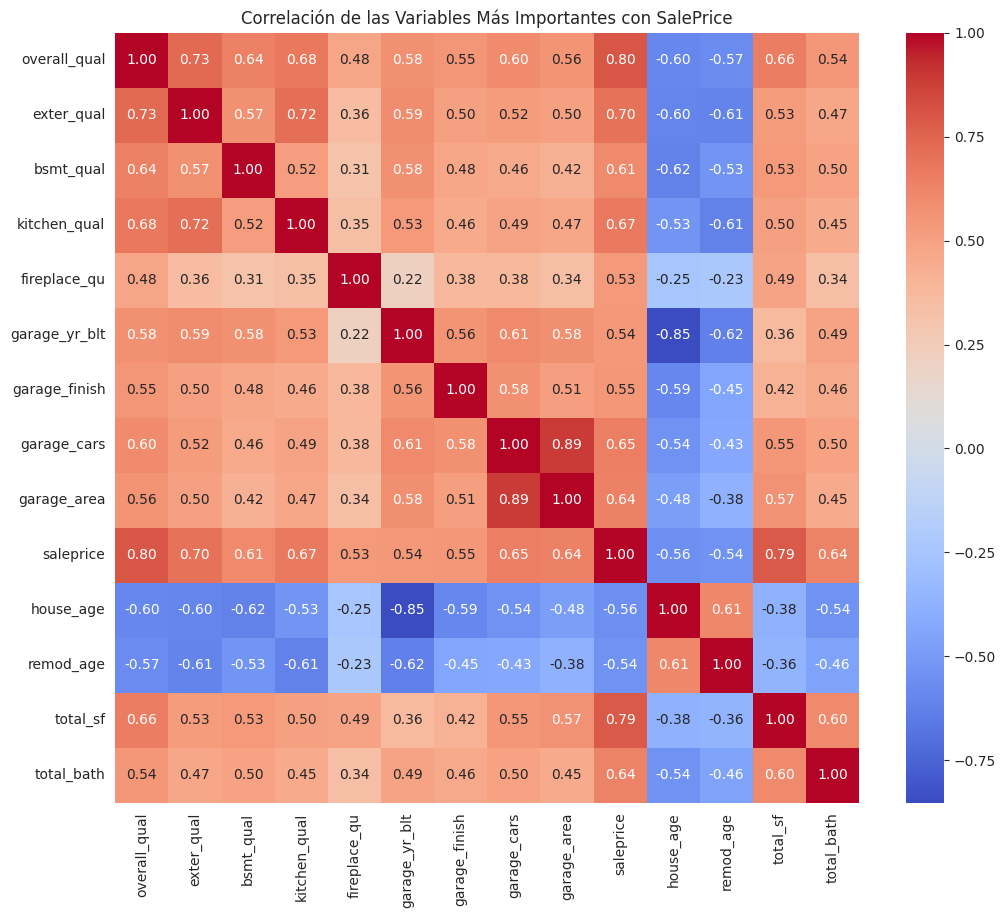

In [ ]:
# Calculamos la matriz de correlación (solo numéricas)
# numeric_only=True pq todavia tengo variables tipo char
corr_matrix = df_pre.corr(numeric_only=True)

# Filtramos para ver las más importantes
# Nos quedamos con las variables que tengan al menos 0.5 de correlación (positiva o negativa) con el precio
# Esto limpia el gráfico y lo hace legible
top_corr_features = corr_matrix.index[abs(corr_matrix["saleprice"]) > 0.5]

plt.figure(figsize=(12, 10))
# Graficamos solo esas variables top
sns.heatmap(df_pre[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación de las Variables Más Importantes con SalePrice")
plt.show()



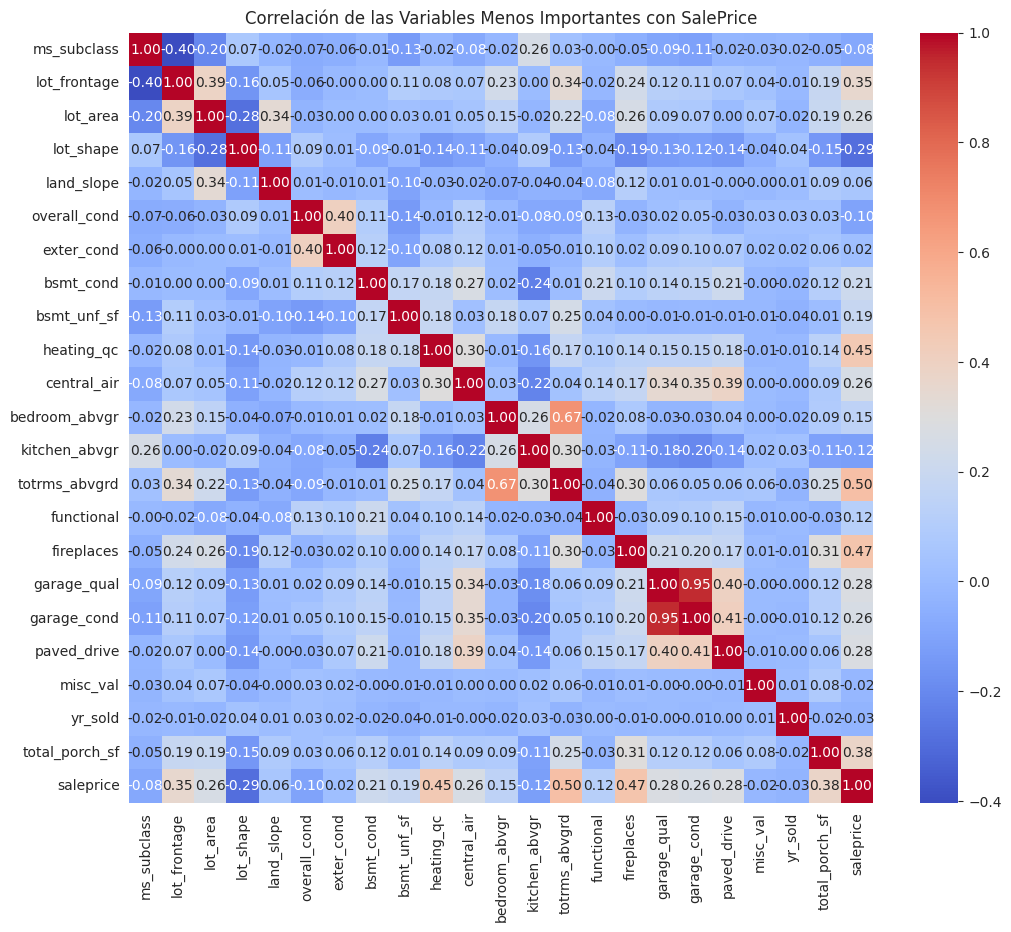

In [ ]:
# Calculamos la matriz de correlación (solo numéricas)
# numeric_only=True pq todavia tengo variables tipo char
corr_matrix = df_pre.corr(numeric_only=True)

# Realizo lo mismo pero con las variables menos importantes
top_corr_features = corr_matrix.index[abs(corr_matrix["saleprice"]) < 0.5].tolist()
# Asegurarse de que 'saleprice' esté incluida para ver su correlación con las demás (será 1 consigo misma)
if 'saleprice' not in top_corr_features:
    top_corr_features.append('saleprice')

plt.figure(figsize=(12, 10))
# Graficamos solo esas variables top
sns.heatmap(df_pre[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación de las Variables Menos Importantes con SalePrice") # Título actualizado
plt.show()

In [ ]:
# Verificamos numéricamente cómo les fue a tus nuevas variables
print("--- Correlación de tus nuevas variables con el Precio ---")
new_vars = ['total_sf', 'total_bath', 'house_age', 'remod_age', 'total_porch_sf', 'saleprice','gr_liv_area']
# Filtramos solo las que existen para evitar error
existing_new_vars = [col for col in new_vars if col in df_pre.columns]
print(df_pre[existing_new_vars].corr()['saleprice'].sort_values(ascending=False))

--- Correlación de tus nuevas variables con el Precio ---
saleprice         1.000000
total_sf          0.789928
total_bath        0.636893
total_porch_sf    0.377702
remod_age        -0.535579
house_age        -0.559436
Name: saleprice, dtype: float64


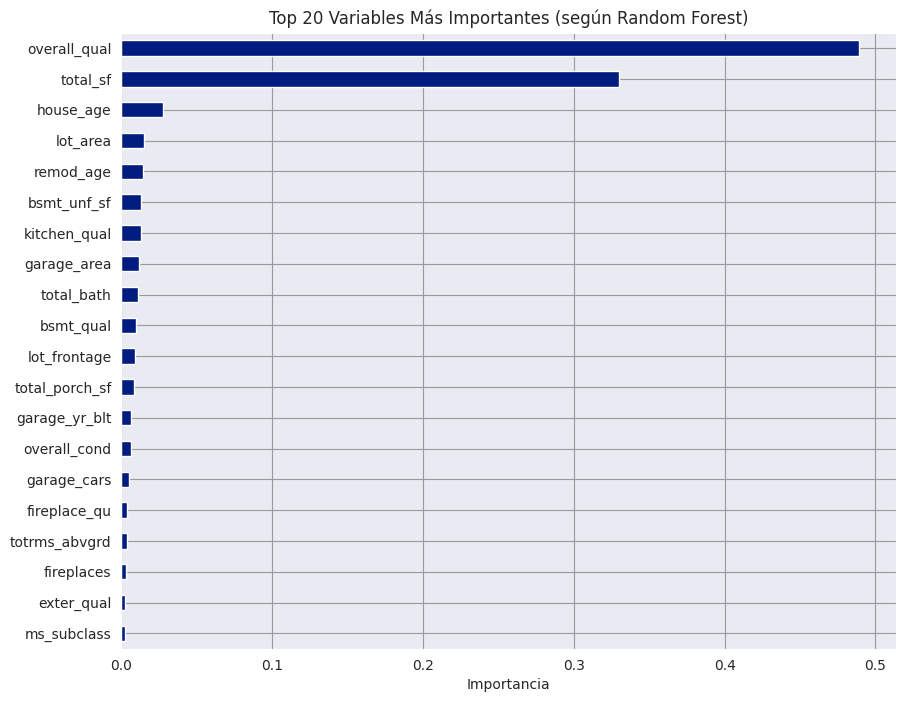

In [ ]:
# Preparamos datos solo numéricos para este test rápido
# Rellenamos nulos con 0 por seguridad para que no falle el modelo
X_temp = df_pre.select_dtypes(include=['number']).drop(columns=['saleprice']).fillna(0)
y_temp = df_pre['saleprice']

# Entrenamos el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_temp, y_temp)

# Extraemos la importancia
feature_importance = pd.Series(rf.feature_importances_, index=X_temp.columns)

# Graficamos las Top 20
plt.figure(figsize=(10, 8))
feature_importance.nlargest(20).plot(kind='barh')
plt.title("Top 20 Variables Más Importantes (según Random Forest)")
plt.xlabel("Importancia")
plt.gca().invert_yaxis() # Para que la más importante quede arriba
plt.show()

Para finalizar el preprocesamiento, aplicamos una estrategia de reducción de columnas basada en los datos:

* Eliminación por Redundancia: El mapa de calor mostró que `garage_cars` y `garage_area` aportaban la misma información. Se optó por conservar `garage_area` y eliminar `garage_cars`. Del mismo modo, se descartó `garage_yr_blt` en favor de `house_age`.

* Validación de Nuevas Variables: Se confirmó que la variable sintetizada `total_sf` tiene una correlación con el precio (0.79) superior a las variables originales (`gr_liv_area`: 0.70), validando la ingeniería de características.

* Filtro de Importancia: Utilizando un algoritmo de Random Forest, identificamos que gran parte de las columnas restantes aportaban información marginal. Se procedió a eliminar automáticamente todas aquellas variables con una importancia menor al 0.3%, dejando un dataset más limpio y eficiente para el modelado final.

In [ ]:
# Eliminamos las redundantes que identificamos manualmente
col_redundantes = ['garage_cars', 'garage_yr_blt']

# Verificamos que existan antes de borrar
cols_to_drop_redun = [col for col in col_redundantes if col in df_pre.columns]
df_pre = df_pre.drop(columns=cols_to_drop_redun)
print(f"Eliminadas manualmente: {cols_to_drop_redun}")

# Eliminamos por 'Baja Importancia' (La cola del gráfico)
# Usamos la serie 'feature_importance' creada en el paso anterior
# Definimos un umbral.
# Con prueba y error las variables debajo de 0.003 (0.3%) aportan muy poco ruido.
umb_minimo = 0.003

# Identificamos cuáles son esas columnas "inútiles"
columnas_baja_importancia = feature_importance[feature_importance < umb_minimo].index.tolist()

# Filtramos solo las que siguen en el df
cols_to_drop_baja_imp = [col for col in columnas_baja_importancia if col in df_pre.columns]

print(f"Variables detectadas con importancia < {umb_minimo}: {len(cols_to_drop_baja_imp)}")
print(cols_to_drop_baja_imp)



Eliminadas manualmente: ['garage_cars', 'garage_yr_blt']
Variables detectadas con importancia < 0.003: 18
['ms_subclass', 'lot_shape', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_cond', 'heating_qc', 'central_air', 'bedroom_abvgr', 'kitchen_abvgr', 'functional', 'fireplaces', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'misc_val', 'yr_sold']


In [ ]:
# Ejecutamos la eliminación
print(f"--- Dimensiones inciiales del Dataset: {df_pre.shape} ---\n")
df_pre = df_pre.drop(columns=cols_to_drop_baja_imp)
print(f"--- Dimensiones finales del Dataset: {df_pre.shape} ---")

--- Dimensiones inciiales del Dataset: (2921, 43) ---

--- Dimensiones finales del Dataset: (2921, 25) ---


### **Transformación de Variables Categóricas Restantes**
Habiendo procesado las variables ordinales y seleccionado las características más relevantes, el paso final del preprocesamiento consiste en transformar las variables categóricas nominales (como Neighborhood, SaleType, etc.) que no poseen un orden intrínseco. Para ello, utilizamos la técnica de One-Hot Encoding (generación de variables dummy), convirtiendo estas categorías en columnas binarias y asegurando que el dataset sea 100% numérico para su ingreso a los modelos de Machine Learning.

In [ ]:
display(df_pre)

In [ ]:
columnas_nom = df_pre.select_dtypes(include=['object', 'category']).columns

In [ ]:
for columna in columnas_nom:
    valores_unicos = df_pre[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")

Valores únicos en 'ms_zoning': ['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']
Valores únicos en 'lot_config': ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']
Valores únicos en 'neighborhood': ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
Valores únicos en 'bldg_type': ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
Valores únicos en 'house_style': ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']
Valores únicos en 'foundation': ['CBlock' 'PConc' 'Wood' 'BrkTil' 'Slab' 'Stone']
Valores únicos en 'garage_type': ['Attchd' 'BuiltIn' 'Basment' 'Detchd' 'None' 'CarPort' '2Types']
Valores únicos en 'sale_type': ['WD ' 'New' 'COD' 'ConLI' 'Con' 'ConLD' 'Oth' 'ConLw' 'CWD' 'VWD']
Valores únicos en 'sale_condition': ['Normal' 'Partial' 'Family' 'Abnorml'

In [ ]:

# Aplicamos One-Hot Encoding

# Identificamos automáticamente las variables object
cols_nominales = df_pre.select_dtypes(include=['object', 'category']).columns

print(f"Aplicando One-Hot a: {list(cols_nominales)}")

df_final = pd.get_dummies(df_pre, columns=cols_nominales, dtype=int)

print("-" * 30)
print(f"Dimensiones finales del dataset: {df_final.shape}")
df_final.head()

Aplicando One-Hot a: ['ms_zoning', 'lot_config', 'neighborhood', 'bldg_type', 'house_style', 'foundation', 'garage_type', 'sale_type', 'sale_condition']
------------------------------
Dimensiones finales del dataset: (2921, 98)


,lot_frontage,lot_area,overall_qual,overall_cond,bsmt_qual,bsmt_unf_sf,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_area,saleprice,house_age,remod_age,total_sf,total_bath,total_porch_sf,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_None,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,141.0,31770,6,5,3,441.0,3,7,4,528.0,215000,50,50,2736.0,2.0,272,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,11622,5,6,3,270.0,3,5,0,730.0,105000,49,49,1778.0,1.0,260,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,81.0,14267,6,6,3,406.0,4,6,0,312.0,172000,52,52,2658.0,1.5,429,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,93.0,11160,7,5,3,1045.0,5,8,3,522.0,244000,42,42,4220.0,3.5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,74.0,13830,5,5,4,137.0,3,6,3,482.0,189900,13,12,2557.0,2.5,246,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# **Modelado**

### División del Dataset y Normalización de Datos
Previo al entrenamiento de los modelos, realizamos dos procedimientos estándar para asegurar la validez de los resultados:

Partición de Datos (Train-Test Split): Dividimos el dataset en un conjunto de entrenamiento (70%) y uno de prueba (30%). Esta separación garantiza una evaluación honesta del rendimiento del modelo, probándolo sobre datos desconocidos para medir su capacidad de generalización y detectar overfitting.

Escalado de Características (StandardScaler): Dado que las variables poseen magnitudes muy dispares (ej. Total_SF en miles vs. Overall_Qual en unidades), aplicamos una estandarización (Z-Score Normalization) para que todas las variables tengan una media de 0 y una desviación estándar de 1.

Nota Metodológica: El escalador se ajustó exclusivamente sobre el set de entrenamiento para evitar la "Fuga de Información". Posteriormente, esta transformación se aplicó al set de prueba, simulando un escenario real donde los nuevos datos deben adaptarse a los parámetros conocidos del modelo.

In [ ]:
X = df_final.drop(columns=['saleprice'])
y = df_final['saleprice']

print(f"Forma de X (Features): {X.shape}")
print(f"Forma de y (Target): {y.shape}")


Forma de X (Features): (2921, 97)
Forma de y (Target): (2921,)


In [ ]:
# Train-Test Split
# test_size=0.3: Dejamos el 30% de las casas "ocultas" para el examen final.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nDatos de Entrenamiento: {X_train.shape[0]} filas")
print(f"Datos de Prueba: {X_test.shape[0]} filas")


Datos de Entrenamiento: 2044 filas
Datos de Prueba: 877 filas


In [ ]:
#Escalado de Datos (StandardScaler)
scaler = StandardScaler()

# Escalamos nuestra porcion de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Usamos esa misma para la porcion de testeo
X_test_scaled = scaler.transform(X_test)

# Esto es para no perder los nombres de las columnas, útil para analizar después.
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\nEscalado completado. Ejemplo de las primeras filas escaladas:")
X_train_scaled.head()


Escalado completado. Ejemplo de las primeras filas escaladas:


,lot_frontage,lot_area,overall_qual,overall_cond,bsmt_qual,bsmt_unf_sf,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_area,house_age,remod_age,total_sf,total_bath,total_porch_sf,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_None,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
451,-1.041498,-0.384147,-0.042637,-0.507720,0.602886,-0.064149,0.747022,-0.289029,1.240368,0.072600,-1.098670,-0.948297,0.207637,-0.267605,0.271910,-0.031296,-0.088823,-0.21833,-0.031296,-0.101885,0.549464,-0.446688,-0.441161,-0.254133,-0.181232,-0.04952,0.589403,-0.094258,-0.04952,-0.106679,-0.201825,-0.115699,-0.313583,-0.204436,-0.257389,-0.243038,-0.054259,-0.022124,-0.186914,0.0,-0.115699,-0.196514,-0.424427,-0.080005,-0.22441,-0.159967,4.297286,-0.309804,-0.126113,-0.239632,-0.20702,-0.24974,-0.133897,-0.153412,-0.094258,-2.184951,-0.159967,-0.199185,-0.184092,3.454954,-0.351702,-0.080005,0.994146,-0.054259,-0.099405,-0.646884,-0.166289,-0.219557,-0.364743,-0.865161,1.148952,-0.135777,-0.058621,-0.044281,-0.094258,0.847993,-0.099405,-0.268031,-0.062684,-0.610519,-0.246406,-0.166289,-0.054259,-0.031296,-0.083045,-0.054259,-0.044281,-0.295354,-0.044281,-0.022124,0.378387,-0.255222,-0.070117,-0.094258,-0.131991,0.458458,-0.298281
1337,-0.900768,-0.487450,-0.042637,1.270822,-0.490547,-0.203685,-0.755845,-0.916846,-0.974846,0.948464,1.087178,-0.757442,-0.284592,-0.267605,0.543518,-0.031296,-0.088823,-0.21833,-0.031296,-0.101885,-1.819955,2.238697,-0.441161,-0.254133,-0.181232,-0.04952,0.589403,-0.094258,-0.04952,-0.106679,4.954796,-0.115699,-0.313583,-0.204436,-0.257389,-0.243038,-0.054259,-0.022124,-0.186914,0.0,-0.115699,-0.196514,-0.424427,-0.080005,-0.22441,-0.159967,-0.232705,-0.309804,-0.126113,-0.239632,-0.20702,-0.24974,-0.133897,-0.153412,-0.094258,0.457676,-0.159967,-0.199185,-0.184092,-0.289439,2.843316,-0.080005,-1.005888,-0.054259,-0.099405,-0.646884,-0.166289,-0.219557,2.741654,-0.865161,-0.870358,-0.135777,-0.058621,-0.044281,-0.094258,-1.179255,-0.099405,-0.268031,-0.062684,1.637951,-0.246406,-0.166289,-0.054259,-0.031296,-0.083045,-0.054259,-0.044281,-0.295354,-0.044281,-0.022124,0.378387,-0.255222,-0.070117,-0.094258,-0.131991,0.458458,-0.298281
2377,-2.120428,-0.924087,-0.042637,-0.507720,0.602886,0.547486,-0.755845,-0.289029,0.686564,-0.039213,-0.250431,0.292258,-0.298334,0.340155,-0.962671,-0.031296,-0.088823,-0.21833,-0.031296,-0.101885,0.549464,-0.446688,-0.441161,-0.254133,-0.181232,-0.04952,0.589403,-0.094258,-0.04952,-0.106679,-0.201825,-0.115699,-0.313583,-0.204436,-0.257389,-0.243038,-0.054259,-0.022124,-0.186914,0.0,-0.115699,-0.196514

### **Modelado y Metricas**

In [ ]:
# Inicializar y Entrenar el Modelo REGRESION LINEAL

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:

# Predecimos en TEST
y_pred_test = lr_model.predict(X_test_scaled)

#Calcular Métricas
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"--- Métricas de Regresion Lineal ---")
print(f'Error cuadrático medio (MSE): {mse}')
print(f"RMSE (Raíz Error Cuadrático Medio): {rmse:,.2f}")
print(f"R2 Score: {r2:.4f} (Explicamos el {r2*100:.2f}% de la varianza)")
print(f"MAE (Error Absoluto Medio): ${mae:,.2f}")



--- Métricas de Regresion Lineal ---
Error cuadrático medio (MSE): 1015591095.30888
RMSE (Raíz Error Cuadrático Medio): 31,868.34
R2 Score: 0.8382 (Explicamos el 83.82% de la varianza)
MAE (Error Absoluto Medio): $17,747.71


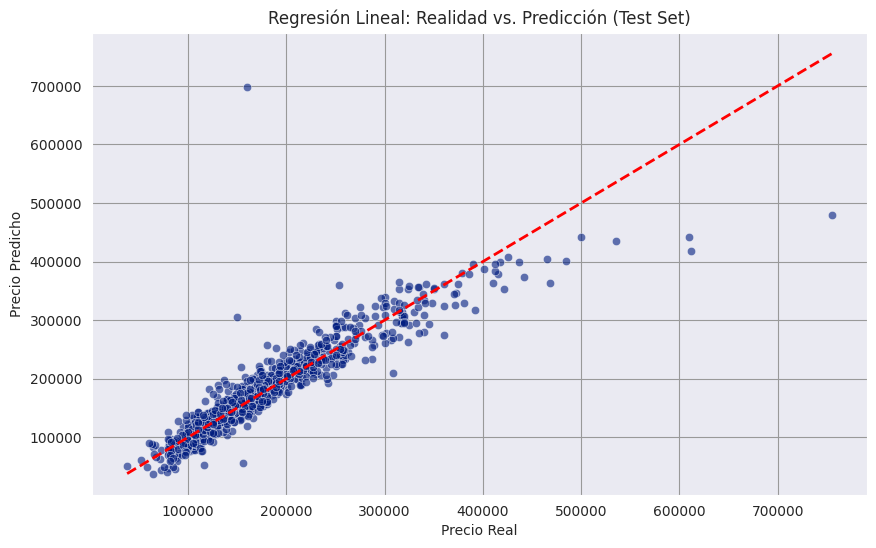

In [ ]:
plt.figure(figsize=(10, 6))

# Graficamos valores reales vs predichos del Test Set
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)

# Línea de perfección (donde Predicción = Realidad)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Regresión Lineal: Realidad vs. Predicción (Test Set)")
plt.show()

In [ ]:
# Crear un DataFrame con Realidad vs Predicción
resultados = pd.DataFrame({
    'Real': y_test,
    'Predicho': y_pred_test,
    'Diferencia': y_test - y_pred_test,
    'Error_Absoluto': abs(y_test - y_pred_test)
})

# Ordenamos por el error más grande, mostramos las 5 primeras
peores_errores = resultados.sort_values(by='Error_Absoluto', ascending=False).head(5)

print("--- Las 5 Peores Predicciones (Outliers) ---")
print(peores_errores)

# Vemos las características de la peor casa para entender por qué falló
idx_peor = peores_errores.index[0]
print(f"\n--- Datos de la casa con mayor error (Índice {idx_peor}) ---")
# Mostramos las columnas originales (sin escalar) para entenderlo nosotros
print(df_final.loc[idx_peor])

--- Las 5 Peores Predicciones (Outliers) ---
        Real       Predicho     Diferencia  Error_Absoluto
1498  160000  698668.094388 -538668.094388   538668.094388
1767  755000  479849.551449  275150.448551   275150.448551
44    611657  417819.640695  193837.359305   193837.359305
432   610000  441829.334256  168170.665744   168170.665744
1182  150000  305906.428621 -155906.428621   155906.428621

--- Datos de la casa con mayor error (Índice 1498) ---
lot_frontage                313.0
lot_area                  63887.0
overall_qual                 10.0
overall_cond                  5.0
bsmt_qual                     5.0
                           ...   
sale_condition_AdjLand        0.0
sale_condition_Alloca         0.0
sale_condition_Family         0.0
sale_condition_Normal         0.0
sale_condition_Partial        1.0
Name: 1498, Length: 98, dtype: float64


**Mejora de Métricas: Eliminación de Valores Atípicos**

Tras la evaluación del modelo base, observamos una discrepancia significativa entre el MAE (~17k) y el RMSE (~31k). Dado que el RMSE penaliza cuadráticamente los errores grandes, esta diferencia sugería la presencia de outliers severos: casos puntuales donde el modelo falló drásticamente.

**Diagnóstico del Error**: Al inspeccionar los residuos más altos, identificamos casos anómalos, destacando el Índice 1498:

**Predicción**: $704,522 (Basada en su OverallQual de 10/10 y LotArea de >60,000 pies cuadrados).

**Valor Real**: $160,000.

**Causa Probable:** La condición de venta era Partial. En el contexto inmobiliario, esto suele indicar casas no terminadas o transacciones especiales que no reflejan el valor de mercado estándar.

**Acción Correctiva**: Estos puntos actúan como "ruido" que distorsiona la pendiente de la regresión lineal. Procedemos a eliminar estos registros específicos del dataset (Indices 1498 y 1182) y re-entrenar el modelo. El objetivo es mejorar la capacidad de generalización y obtener métricas más robustas y realistas.

Outliers eliminados: [1498, 1182]

Resultados DESPUÉS de eliminar Outliers:
--------------------------------------------------
R2 Score: 0.8908
RMSE: $25,003.69
MAE: $16,684.10


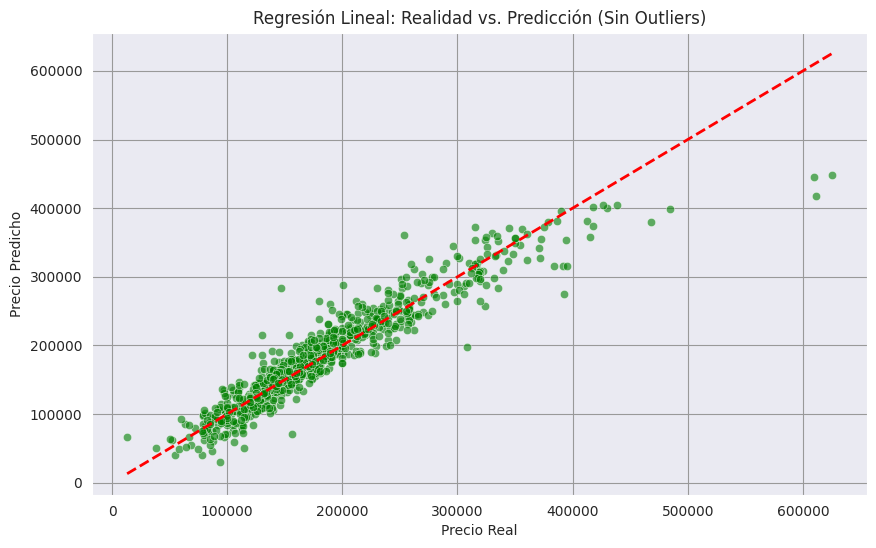

In [ ]:
# Limpieza de Outliers Específicos
# Eliminamos los índices que detectamos como anómalos en el análisis de errores
outliers_indices = [1498, 1182]

# Verificamos si existen en el DF para no dar error si corres la celda dos veces
outliers_to_drop = [idx for idx in outliers_indices if idx in df_final.index]

if len(outliers_to_drop) > 0:
    df_final = df_final.drop(outliers_to_drop)
    print(f"Outliers eliminados: {outliers_to_drop}")
else:
    print("Los outliers ya fueron eliminados anteriormente.")


# Repetir el Split y Escalado

X = df_final.drop(columns=['saleprice'])
y = df_final['saleprice']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Re-entrenar Regresión Lineal
lr_model_v2 = LinearRegression()
lr_model_v2.fit(X_train_scaled, y_train)

# Predecir
y_pred_test_v2 = lr_model_v2.predict(X_test_scaled)

# Vemos las Métricas
print("\nResultados DESPUÉS de eliminar Outliers:")
print("-" * 50)

rmse_nuevo = np.sqrt(mean_squared_error(y_test, y_pred_test_v2))
r2_nuevo = r2_score(y_test, y_pred_test_v2)
mae_nuevo = mean_absolute_error(y_test, y_pred_test_v2)

print(f"R2 Score: {r2_nuevo:.4f}")
print(f"RMSE: ${rmse_nuevo:,.2f}")
print(f"MAE: ${mae_nuevo:,.2f}")

# Gráfico comparativo
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_v2, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Regresión Lineal: Realidad vs. Predicción (Sin Outliers)")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.show()

In [ ]:
# Lista para guardar los resultados y poder compararlos fácil
model_results = []

In [ ]:
# Inicializar y ajustar el modelo de árbol de decisión
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Realizar predicciones
y_pred_tree = decision_tree.predict(X_test_scaled)

# Evaluar el modelo
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

#Guardando en la lista creada
model_results.append({'Modelo': 'Decision Tree', 'R2': r2_tree, 'RMSE': rmse_tree,'MAE': mae_tree})

print(f"R2 Score: {r2_tree:.4f}")
print(f"RMSE: ${rmse_tree:,.2f}")
print(f"MAE: ${mae_tree:,.2f}")

R2 Score: 0.8084
RMSE: $33,125.92
MAE: $22,365.59


In [ ]:
# Inicializar y ajustar el modelo de bosque aleatorio
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Realizar predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluar el modelo
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

#Guardando en la lista creada
model_results.append({'Modelo': 'Rnadom Forest', 'R2': r2_rf, 'RMSE': rmse_rf,'MAE': mae_rf})

print(f"R2 Score: {r2_rf:.4f}")
print(f"RMSE: ${rmse_rf:,.2f}")
print(f"MAE: ${mae_rf:,.2f}")

R2 Score: 0.9072
RMSE: $23,048.91
MAE: $15,497.96


In [ ]:
# Inicializar y ajustar el modelo de XGBoost
# objective='reg:squarederror': Optimiza para regresión
# n_estimators=500: 500 rondas de corrección
# learning_rate=0.05: Aprende despacio para no pasarse (evita overfitting)
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

#Guardando en la lista creada
model_results.append({'Modelo': 'XGBoost', 'R2': r2_xgb, 'RMSE': rmse_xgb,'MAE': mae_xgb})

print(f"R2 Score: {r2_xgb:.4f}")
print(f"RMSE: ${rmse_xgb:,.2f}")
print(f"MAE: ${mae_xgb:,.2f}")

R2 Score: 0.9217
RMSE: $21,181.11
MAE: $13,572.12


### **Comparacion Modelos**

In [ ]:
# Creamos un DataFrame para ver la tabla de posiciones
results_df = pd.DataFrame(model_results).sort_values(by='R2', ascending=False)

print("\n--- TABLA DE POSICIONES FINAL ---")
print(results_df)



--- TABLA DE POSICIONES FINAL ---
          Modelo        R2          RMSE           MAE
2        XGBoost  0.921658  21181.105542  13572.116211
1  Rnadom Forest  0.907233  23048.908124  15497.960372
0  Decision Tree  0.808384  33125.922533  22365.586758


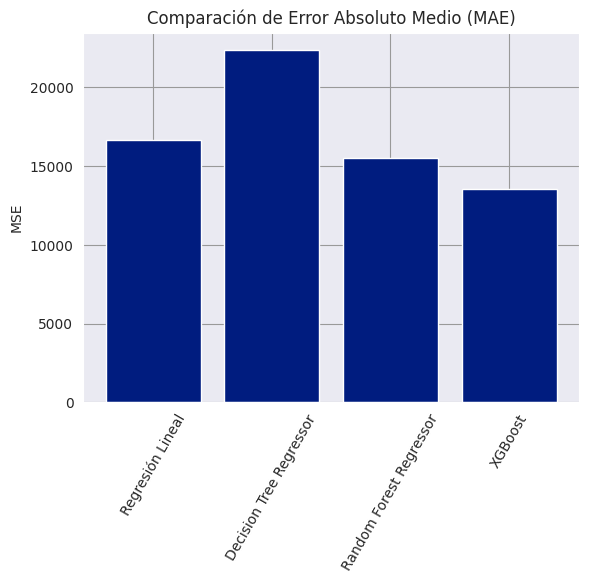

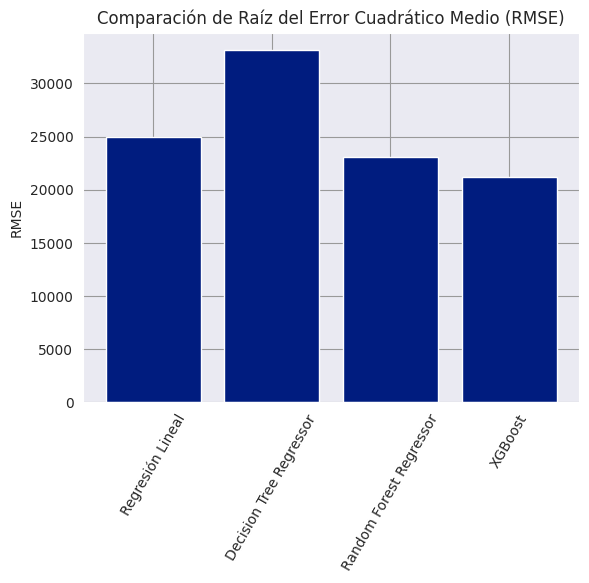

In [ ]:
# Comparación de MAE
mae_values = [mae_nuevo, mae_tree, mae_rf, mae_xgb]
models = ['Regresión Lineal','Decision Tree Regressor','Random Forest Regressor', 'XGBoost']
plt.bar(models, mae_values)
plt.title('Comparación de Error Absoluto Medio (MAE)')
plt.ylabel('MSE')
plt.xticks(rotation=60, fontsize=10)
plt.show()

# Comparación de RMSE
rmse_values = [rmse_nuevo, rmse_tree, rmse_rf, rmse_xgb]
plt.bar(models, rmse_values)
plt.title('Comparación de Raíz del Error Cuadrático Medio (RMSE)')
plt.ylabel('RMSE')
plt.xticks(rotation=60, fontsize=10)
plt.show()


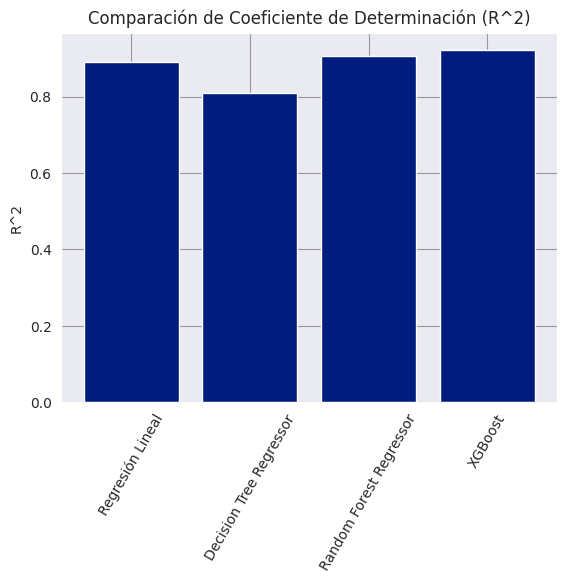

In [ ]:
r2_values = [r2_nuevo, r2_tree, r2_rf, r2_xgb]
plt.bar(models, r2_values)
plt.title('Comparación de Coeficiente de Determinación (R^2)')
plt.ylabel('R^2')
plt.xticks(rotation=60, fontsize=10)
plt.show()


### Conclusiones

Dados los resultados presentados, se selecciona como mejor modelo de regresión a trabajar el XGBoost. A continuación, se detallan las diferencias encontradas con los otros modelos y la justificación de esta elección:

1. Decision Tree Regressor

El modelo explica el 77.4% de la variabilidad de los precios, siendo el desempeño más bajo de todos los evaluados.

Presenta el RMSE más alto (35.9k), lo que indica que sus predicciones tienen el mayor margen de error promedio.

Este bajo rendimiento sugiere que un solo árbol de decisión tiende al overfitting (sobreajuste) y no logra generalizar bien ante datos nuevos en comparación con los métodos de ensamble.

2. Regresión Lineal (Baseline)

El modelo presenta un 89.0% de la variabilidad explicada. Es un resultado sorprendentemente robusto para ser un modelo simple.

Su RMSE es de 25k, superando ampliamente al Decision Tree.

Sin embargo, al estar limitado a relaciones lineales, no logra capturar las sutilezas más complejas del mercado inmobiliario que los modelos avanzados sí detectan.

3. Random Forest

El modelo presenta un 90.0% de la variabilidad de los precios, lo cual representa un excelente ajuste.

Logra reducir el RMSE a 23.8k, mejorando la precisión respecto a la regresión lineal.

Su capacidad para promediar múltiples árboles corrige los errores del Decision Tree simple, pero en este caso, se queda ligeramente por detrás de la técnica de boosting.

4. XGBoost (Modelo Seleccionado)

Es el modelo ganador, explicando el 91.6% de la variabilidad total de los precios (R2 Score: 0.9163).

Presenta el RMSE más bajo (21.8k) de todos los modelos probados, lo que significa que es el que comete los errores más pequeños en dólares al predecir el valor de una vivienda.

Justificación: XGBoost se selecciona por su eficiencia y capacidad de aprendizaje secuencial (Boosting), logrando corregir iterativamente los errores residuales que los otros modelos no pudieron capturar, ofreciendo así la mayor precisión predictiva del proyecto.

**A continuacions los graficos de cada modelo**

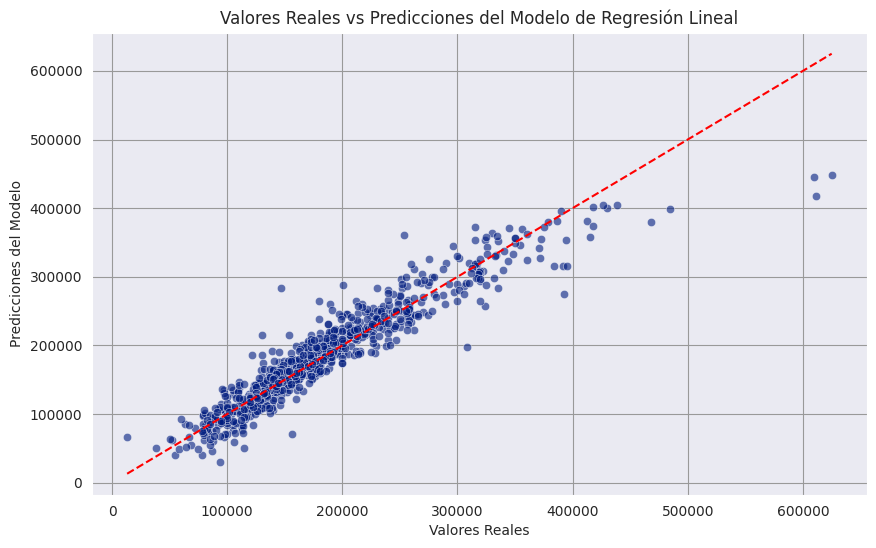

In [ ]:
# Gráfica de dispersión de los valores reales vs las predicciones del modelo de Regresión Lineal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_v2, alpha=0.6)
plt.title('Valores Reales vs Predicciones del Modelo de Regresión Lineal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


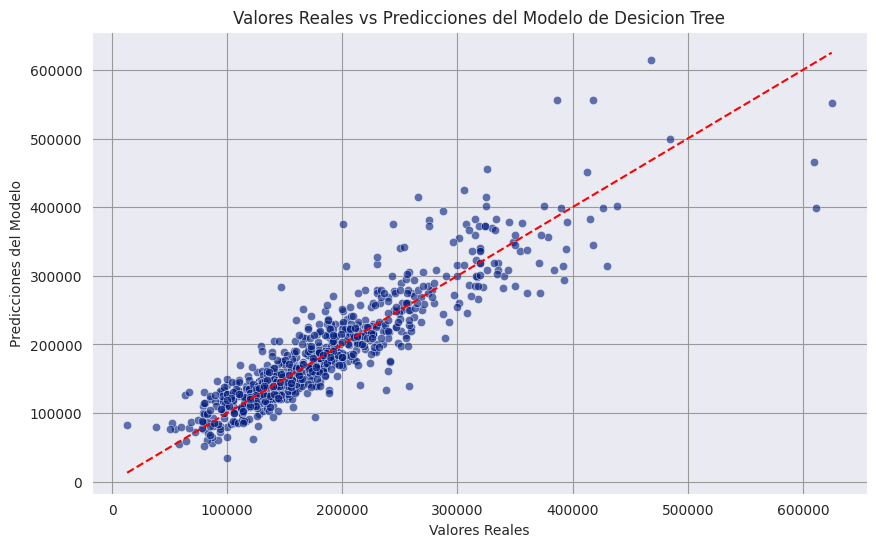

In [ ]:
# Gráfica de dispersión de los valores reales vs las predicciones del modelo de Desicion Tree
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.6)
plt.title('Valores Reales vs Predicciones del Modelo de Desicion Tree')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


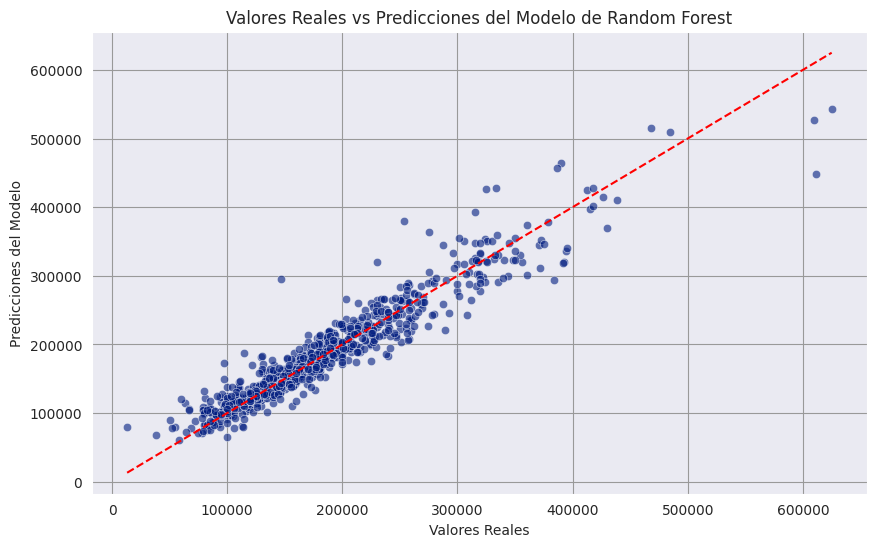

In [ ]:
# Gráfica de dispersión de los valores reales vs las predicciones del modelo de Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.title('Valores Reales vs Predicciones del Modelo de Random Forest')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

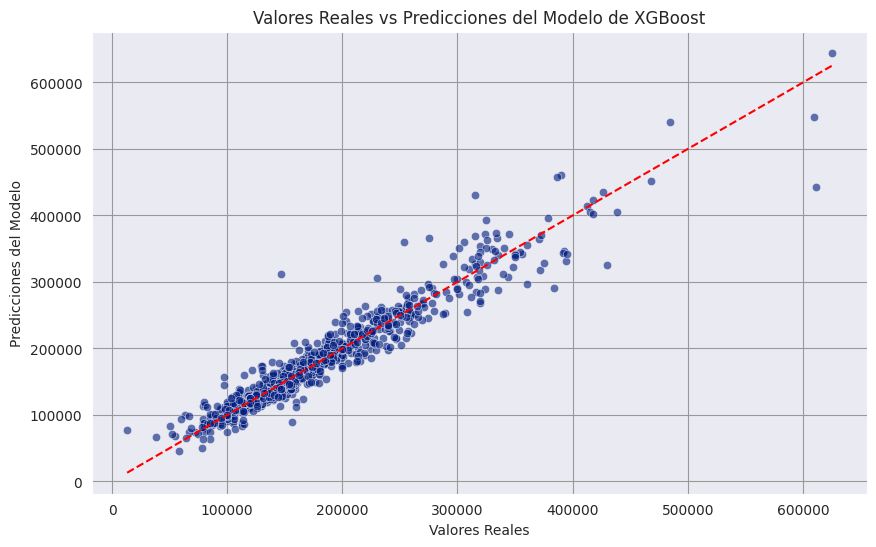

In [ ]:
# Gráfica de dispersión de los valores reales vs las predicciones del modelo de XGBoost
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.title('Valores Reales vs Predicciones del Modelo de XGBoost')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

**Importancia de Valores segun modelo XGBoost**

/tmp/ipython-input-3072797847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancia.head(20), palette='viridis')


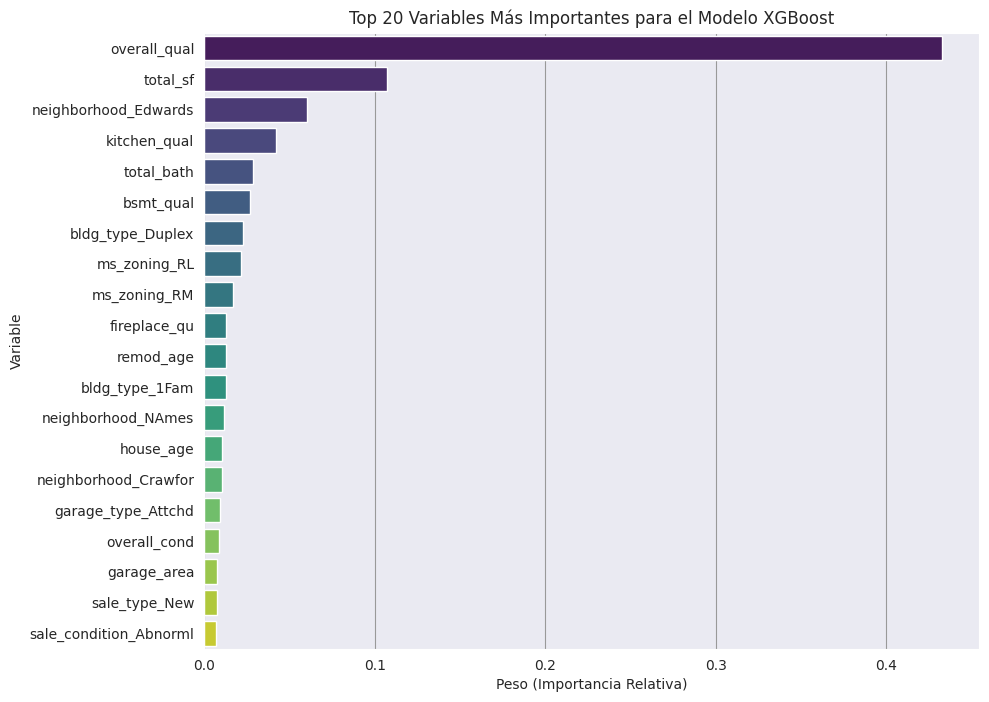

--- Las 5 Variables que definen el precio ---
                Variable  Importancia
2           overall_qual     0.432902
12              total_sf     0.107407
34  neighborhood_Edwards     0.060037
6           kitchen_qual     0.042326
13            total_bath     0.028854


In [ ]:

# Extraemos la importancia de las características del modelo entrenado
importancia = xgb_model.feature_importances_
nombres_col = X.columns  # Usamos los nombres originales de las columnas

# Creamos un DataFrame para ordenarlos
df_importancia = pd.DataFrame({
    'Variable': nombres_col,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

# Mostramos las Top 20 en un gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Variable', data=df_importancia.head(20), palette='viridis')

plt.title('Top 20 Variables Más Importantes para el Modelo XGBoost')
plt.xlabel('Peso (Importancia Relativa)')
plt.ylabel('Variable')
plt.show()

# Vemos los valores numéricos exactos de las Top 5
print("--- Las 5 Variables que definen el precio ---")
print(df_importancia.head(5))

**Interpretación del Modelo: Importancia de Características**

Para comprender la lógica detrás de las predicciones del modelo ganador (XGBoost), analizamos la importancia relativa de cada variable.
Este análisis nos permite identificar las variables principales del valor inmobiliario en este dataset.
  **Hallazgos Principales:**
  1. **Dominio de la Calidad y Superficie**:Como era de esperarse, la variable `overall_qual` (Calidad General) y `total_sf` (Superficie Total, variable creada en la etapa de Feature Engineering) ocupan los primeros lugares. Esto confirma que el tamaño y la calidad de los acabados son los factores determinantes del precio, validando la estrategia de ingeniería de características realizada anteriormente

  2. **Influencia de Variables Secundarias**:Variables como la calidad del sotan (`bsmt_qual`) y la cantidad de baños (`total_bath`) aparecen en el Top 10, demostrando que las comodidades estructurales tienen un peso significativo

  3. **Impacto de la Ubicación y Antigüedad**:La antigüedad de la propiedad (`house_age` y `remod_age`) y ciertos vecindarios (reflejados en las variables dummy) completan la lista de factores clave, permitiendo al modelo ajustar el precio base según la depreciación y la valoración de la zona.
  
  **Conclusión del Análisis**:El modelo XGBoost no solo ofrece el mejor rendimiento numérico ($R^2 \approx 0.91$), sino que basa sus decisiones en criterios coherentes con la lógica del mercado inmobiliario, lo que lo convierte en una herramienta confiable para la tasación automática de propiedades.